# Data & Apprentissage Assignment (Part 2), Aicha MAAOUI

### Table of contents:

[Exercise 1](#ex1)
<a href='ex1'></a>

[Exercise 2](#ex2)
<a href='ex2'></a>

[Exercise 3](#ex3)
<a href='ex3'></a>

[Exercise 4](#ex4)
<a href='ex4'></a>

## Exercise 1: The effects of the curse of dimensionality <a id='ex1'></a>

We consider in this exercise a set of data points uniformly distributed in a p-dimensional unit hypercube $[0,1]^p$ (represented in figure (2.6) in grey), to which we apply the k-nearest-neighbor procedure. Suppose, predictions are to be made about a target point. for this purpose, an hypercube neighborhood (whose edges are colored in orange in figure (2.6)) is drawn around a target point to capture a fraction $r$ of the observations (also corresponds to a fraction of the total unit volume) [1.1](https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12_toc.pdf). 

### Figure 2.6: The curse of dimensionality

In [113]:
# Import necessary libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import make_interp_spline
from matplotlib.patches import Rectangle
# import plotly.express as px

# Deactivate warnings
import warnings
warnings.filterwarnings("ignore")

<Figure size 640x480 with 0 Axes>

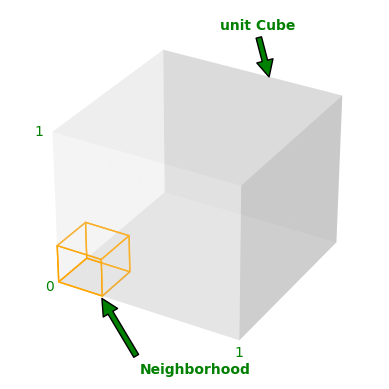

In [61]:
x, y, z = np.indices((4, 4, 4))

# Figure
fig = plt.figure()

# Create unity cube and sub-cube
cube1 = (x <4) & (y <4) & (z <4)
cube2 = (x==0) & (y ==0) & (z == 0)

voxelarray1 = cube1
voxelarray2 = cube2

# Set colors of the cubes
colors1 = np.empty(voxelarray1.shape, dtype=object)
colors2 = np.empty(voxelarray2.shape, dtype=object)

colors1[cube1] = 'white'
colors2[cube2] = 'red'
colorbar = [1, 1, 1, 0]

# Plotting the two cubes
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray1, facecolors=colors1, edgecolor='none', alpha=0.2)
ax.voxels(voxelarray2, facecolors=colors2, edgecolor='orange', alpha=0)

# Set panes as transparent
ax.xaxis.set_pane_color(colorbar)
ax.yaxis.set_pane_color(colorbar)
ax.zaxis.set_pane_color(colorbar)

# Set axis-lines as transparent
ax.w_xaxis.line.set_color(colorbar)
ax.w_yaxis.line.set_color(colorbar)
ax.w_zaxis.line.set_color(colorbar)

# Set the grid as transparent
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Add the text annotations
plt.annotate(
'unit Cube', color='green', fontweight="bold", xy=(0.035, 0.055), xytext=(0.01, 0.08),
arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate(
'Neighborhood', color='green', fontweight="bold", xy=(-0.05, -0.053), xytext=(-0.03, -0.092),
arrowprops=dict(facecolor='green', shrink=0.05))

# Add labels
ax.annotate('0', color='green', xy=(-0.075, -0.052), xytext=(-0.5, -0.5), 
            textcoords='offset points', ha='center', va='bottom')

ax.annotate('1', color='green', xy=(0.02, -0.085), xytext=(-0.5, -0.5), 
            textcoords='offset points', ha='center', va='bottom')

ax.annotate('1', color='green', xy=(-0.08, 0.026), xytext=(-0.5, -0.5), 
            textcoords='offset points', ha='center', va='bottom')

plt.show()


$\mathbf{\text{Figure (1.1)(a): Illustration of the sub-cubical neighborhood for uniform data distribution inside a unit cube}}$.

Given the distribution uniformity, the expected edge length of the cube is given as follows: 

$\boxed{edge_p(r) = r^{\frac{1}{p}}}  \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \,  \mathbf{(Eq. (1.1))}$

One can notice from the equation (1.1) that $\lim_{(p\to\infty)} edge_p(r) = 1$, meaning that in higher dimensions, the small subcube tends to cover all the unit hypercube.

The edge-length $edge_p(r)$ variation in function of the volume fraction $r$ is plotted in the figure (1.1)(b). Each curve represents a fixed dimension $p$ of the hypercube. Then, the elge-length is calculated using equation (1.1) for different values of fractions $r$ of the observation. These variations could also be resumed in the table hereunder:

| dimension (p)| edge (r=0.2) | edge (r=0.4) | edge (r=0.6) |
| --- | --- | --- | --- |
| 1 | 0.2 | 0.4 | 0.6 |
| 2 | 0.447 | 0.632 | 0.775 |
| 3 | 0.585 | 0.737 | 0.843 |
| 10 | 0.851 | 0.912 | 0.95 |

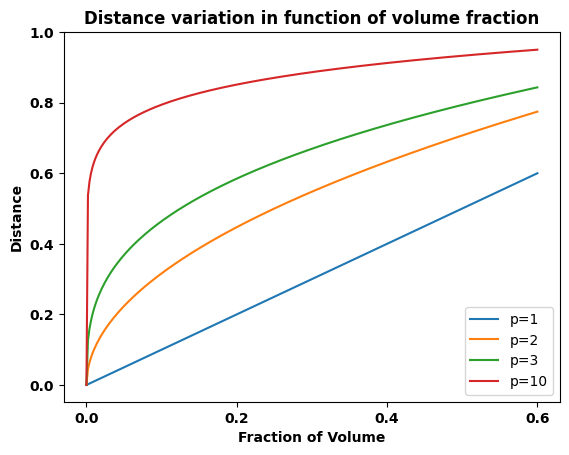

In [62]:
# Define a function to calculate the edge-length of a uniform-distribution cube
def edge_length(r,p):
    return (pow(r,(1/p)))

# Initialize the parameters
degree = [1,2,3,10] # p
fraction_obs = np.linspace(0, 0.6, 300) # r

# Set length as a dict
l = {"l1": [], "l2": [], "l3": [], "l4": []}

# Plot the edge-length as a function of r and p
for i in range (len(degree)):
    for j in range (len(fraction_obs)):
        l['l'+str(i+1)].append(edge_length(fraction_obs[j],degree[i]))
# print(l)

# Plot the second curve of fig (2.6)
for i in range(len(degree)):
    smoothcurve = make_interp_spline(fraction_obs, l['l'+str(i+1)])
    plt.plot(fraction_obs,smoothcurve(fraction_obs))

# Add titles, labels and legend
plt.title("Distance variation in function of volume fraction", fontweight="bold")
plt.xlabel("Fraction of Volume", fontweight="bold")
plt.ylabel("Distance", fontweight="bold")

plt.xticks(np.arange(0, 0.8, step=0.2), fontweight="bold") 
plt.yticks(np.arange(0, 1.2, step=0.2), fontweight="bold") 
plt.legend(["p=1", "p=2", "p=3", "p=10"], loc=0)

$\mathbf{\text{Figure (1.1)(b): Illustration of the needed side-length of the subcube to capture a fraction $r$ of the data volume for different dimensions $p$}}$

From figure (1.1)(b), one can notice the following:
* $\underline{\text{For dimension $p=1$}}$, the variation of the cube edge-length with respect to the fraction of volume $r$ is linear (represented by the blue color). This means that the subcube neighborhood is local and tiny,
* $\underline{\text{For dimension $p>1$}}$, the cube edge-length increases as we increase the dimension. This means that the subcube will no longer be nor tiny nor local. For instance, if we consider the derivative of the equation (1.1), we obtain the following: 

$\boxed{edge_p'(r) = \frac{1}{p} \; r^{\frac{1-p}{p}}}  \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \,   \mathbf{(Eq. (1.2))}$

Since the power of the volume fraction $r$ is negative ($p>1$ means $1-p<1$), equation (1.2) is equivalent to: 

$\boxed{edge_p'(r) = \frac{1}{p} \; (\frac{1}{r})^{\frac{p-1}{p}}}  \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \,\, \,  \, \, \mathbf{(Eq. (1.3))}$

We are only considering a fraction of volume inside a unit cube, then the fraction $r$ is less than $1$ leading to an important $(\frac{1}{r})$ value. Thus, if increase the dimension $p$, the power $(r^{p-1})$ grows exponentially and $(\frac{1}{p})$ becomes smaller.

This example illustrates the "curse of dimensionality" phenomenon, a notion introduced by "Bellman" in his book “Dynamic programming” [2](https://www.gwern.net/docs/statistics/decision/1957-bellman-dynamicprogramming.pdf). It demonstrates that in high dimensional problems, the points are isolated (data points aren't close to each other) and therefore, an observation may not have close neighbors. For instance, if we consider a 10-dimensional cube $(p=10)$, in order to cover $1\%$ of the datapoints $(r=0.01)$, we have to consider a cube edge length equal to $63\%$ of the unit edge!

### Figure 2.7: A simulation example, demonstrating the curse of dimensionality and its effect on MSE, bias and variance

#### Example: 1-nearest neighbor model

In this example, we suppose to have $N=1000$ training samples $x_i$ uniformly distributed on an hypercube $[-1,1]^p$ (where $p$ is the dimension). Both $X$ and $Y$ have a deterministic dependence as stated in the equation (1.4) below.

$\boxed{Y = f(X) = exp(-8 \; ||X||^2)}  \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \, \, \, \,  \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \,  \mathbf{(Eq. (1.4))}$

#### Figure 2.7.a: 1-NN in One Dimension
In this figure, the variation of the function $f(x)$ with respect to $x$, where $x$ is in the range of $[-1,1]$ is plotted.

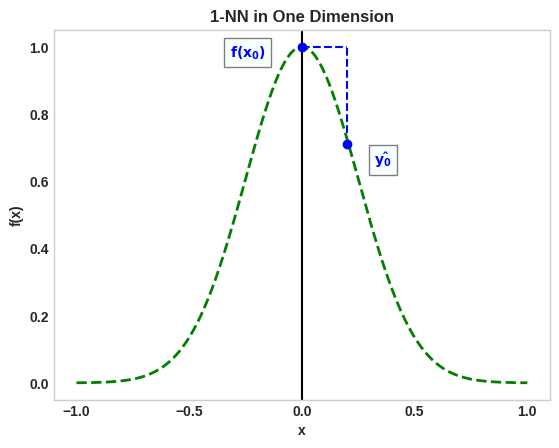

In [119]:
# Define the function from equation (1.4)
def func(x):
    return math.exp(-8*x*x)

# Define the N simple points
N=1000

# Define the x-axis (x) and y-axis (f(x))
x=[-1]
f=[math.exp(-8)]
radius=0
for i in range(1,N+1):
    x.append(-1+i*2/N)
    f.append(func(x[i]))
    radius+=pow(x[i],2)

radius=math.sqrt(radius)

# Plot the first curve of figure (2.7)
plt.plot(x,f, color='green', linestyle='dashed',linewidth=2)
plt.axvline(x = 0, color = 'black')

# Plot point f(x0)=0
# Vertical line
plt.vlines(x = 0.2, ymin = 0.71, ymax = 1, color = 'blue', linestyle='dashed')
# Horizontal line
plt.hlines(y=1, xmin=0, xmax=0.2, color='blue', linestyle='dashed')

# Plotting points
plt.plot(0,1,'bo')
plt.plot(0.2,0.71,'bo')

# Add titles, labels and legend
plt.title("1-NN in One Dimension", fontweight="bold")
plt.xlabel("x", fontweight="bold")
plt.ylabel("f(x)", fontweight="bold")

plt.xticks(np.arange(-1, 1.5, step=0.5), fontweight="bold") 
plt.yticks(np.arange(0, 1.2, step=0.2), fontweight="bold") 

plt.text(-0.32, 0.97, '$\mathbf{f(x_0)}$', color='blue', fontweight="bold", bbox=dict(facecolor='azure', alpha=0.5))
plt.text(0.32, 0.65, '$\mathbf{\hat{y_0}}$', color='blue', fontweight="bold", bbox=dict(facecolor='azure', alpha=0.5))
plt.grid(False)

One takeaway from the above curve showing the target function is that when the nearest-neighbor is at a point $x=0$, the mean-square-error is also zero. Apart from that, $\hat{y_0}<f(x_0)$ [2](https://m0nads.wordpress.com/2017/08/05/the-curse-of-dimensionality-part-2/). The figure is drawn for a small dimension $p=1$ (where $||x||^2=x^2$). In such a case, the neighbor is close to the test point $x_0=0$.

#### Figure 2.7.b: 1-NN in One vs. Two Dimensions
In this figure, $24$ data points were generated using the uniform random distribution between $-1$ and $1$ (with a random seed value indicated in the code below) plotted in the case of two dimensions $x_1$ and $x_2$. We also plot:

* An orange rectangle characterized by $x_1 \in [-|nn|,|nn|]$ and $x_2 \in [-1,1]$, where $nn$ is the nearest-neighbor of the test point $x_0=0$
* A blue circle characterized by a center $(x_1=0,x_2=0)$ and a radius equal to the minimum distance between a point defined by $(x_1=0,x_2=0)$ and another point $(x_1,x_2)$.

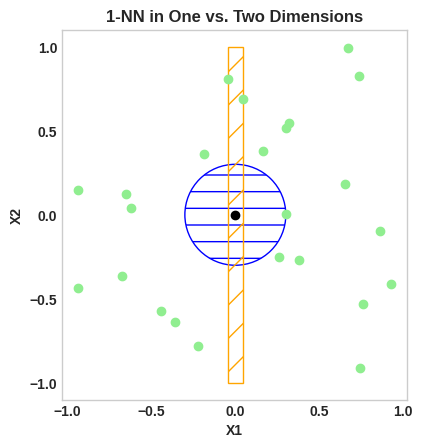

In [118]:
np.random.seed(50)

# Define a uniform distribution function (size: pxN)
def uniform_distribution(p,N):
    dataset=[]
    for i in range (p):
        dataset.append(np.random.uniform(low=-1, high=1, size=N))      
    return np.array(dataset)

# Define the Euclidean distance calculation function between point (0,0) and point (x1,x2)
def euclidean_distance(x1,x2):
    return math.sqrt(x1*x1 + x2*x2)

# Generate the uniform distribution for a dimension p and a dataset number N
p = 10
x = uniform_distribution(p,N)

# The top right figure of graph (2.7) in the book section counts 24 sample points (colored in light green)
nb_obs_samples = 24
x1 = x[1][0:nb_obs_samples] # First dimension (24 samples)
x2 = x[2][0:nb_obs_samples] # Second dimension (24 samples)

# The nearest neighbor of 0 in 1 dimension
nn = min(abs(x1))

dist = [euclidean_distance(x1[i],x2[i]) for i in range(len(x1))]

# Define the circle radius (equal to the minimum of the euclidian distance)
r = min(dist)

# Plot
figure, ax = plt.subplots()
# Plot of the points distribution
y0_hat_mat = np.zeros((p,N))

# Plot the circle
plt.plot(x1,x2,'bo', color='lightgreen')
circ = plt.Circle((0, 0), radius=r , color='blue', fill = False, hatch='-' )
ax.set_aspect( 1 ) 
ax.add_patch(circ)

# Plot the rectangle
ax.add_patch(Rectangle((-abs(nn), -1), 2*abs(nn), 2, color='orange', fill = False, hatch='/'))

# Add center point
plt.plot(0,0,'bo', color='black')

# Add the title, labes and ticks
plt.title("1-NN in One vs. Two Dimensions", fontweight="bold")
plt.xlabel("X1", fontweight="bold")
plt.ylabel("X2", fontweight="bold")

plt.xticks(np.arange(-1, 1.5, step=0.5), fontweight="bold") 
plt.yticks(np.arange(-1, 1.5, step=0.5), fontweight="bold")
plt.grid(False)

plt.show()

One can notice that by increasing the dimension $p$, the radius of the circle representing the 1-neart-neighbor increases. 

#### Figure 2.7.c: Distance to 1-NN vs. Dimension
In this figure, the variation to the average distance of the 1-nearest-neighbor is plotted with respect to the dimension $p$. The distance is calculated using the matrix distance and the minimums are then averaged to determine the average distance to the 1-nearest-neighbor.

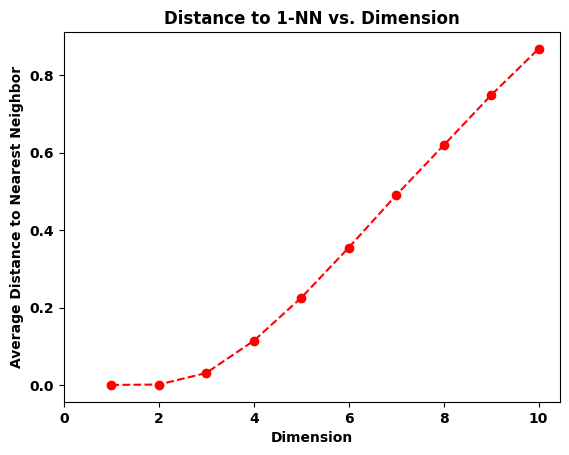

In [44]:
# From my Assignment 1
# Compute the Euclidean distance between 2 points pt1 and pt2 defined by (x1,x2,...,xp)
# Here, every column of the dataset(of size pxN) represents a point
def compute_dist(pt1,pt2):  
    return math.sqrt(sum([pow((pt1[i]-pt2[i]),2) for i in range(len(pt1))]))

# Define the Euclidean distance matrix (N = number of point samples, p-dim)
def euclidean_distance_matrix(p,N):    
    # Extract points
    x = uniform_distribution(p,N)
    points = x[:, 0:N].transpose()
        
    # Extract distance matrix
    dist_matrix = np.zeros((N,N))
    for i in range(N):
        for j in range(i):
            dist = compute_dist(points[i], points[j])
            dist_matrix[i,j], dist_matrix[j,i] = dist, dist
    return dist_matrix

# Median radius
def average_distance(dist_matrix,N):
    min_dist_matrix=[]
    for i in range(N):
        min_dist_matrix.append(min((dist_matrix + np.identity(N))[i]))
    return np.mean(min_dist_matrix)

# Compute the average distance to the nearest neighbor
dimension = np.linspace(1,10,10)
dist=[0]
for p in range(1,10):
    dist.append(average_distance(euclidean_distance_matrix(p,N),N))

# Change the plot style
plt.plot(dimension,dist, 'bo--', color='red')

# Add titles, labels and legend
plt.title("Distance to 1-NN vs. Dimension", fontweight="bold")
plt.xlabel("Dimension", fontweight="bold")
plt.ylabel("Average Distance to Nearest Neighbor", fontweight="bold")

plt.xticks(np.arange(0, 12, step=2), fontweight="bold") 
plt.yticks(np.arange(0, 1, step=0.2), fontweight="bold")
warnings.filterwarnings("ignore")

One can notice from the figure (2.7.c) that the average distance to the nearest-neighbor increases with respect to the dimension increase. This demonstrates that when increasing the dimension, the nearest-neighbor gets far away from the target point.

#### Figure 2.7.d: MSE vs. Dimension
Here, the 1-nearest-neighbor (1NN) is used in order to predict $y_0= f(x_0 = 0)$, by searching for the nearest-neighbor value $x_1$ to the test point $x_0 = 0$. The predicted value $(\hat{y_0})$ will be determined using equation (1.4), where $X=x_1$, such that: $\hat{y_0} = \exp{(-8 \; ||x_1||^2)}$.

To dertermine the expected prediction error at the test point $x_0=0$, we average over the $N=1000$ samples. Given that the problem is deterministic, the mean squared-error (MSE) to estimate $f(x_0=0)$ (prediction over the training set $T$) could be decomposed using the bias-variance decomposition shown in equation (1.5):

$\boxed{MSE(x_0) = \mathbb{E}_T [f(x_0) - \hat{y_0}]^2 = Var_T(\hat{y_0}) + Bias^2(\hat{y_0})} \, \, \, \, \, \, \, \, \, \, \,  \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \, \, \, \,\, \, \, \, \,\, \, \, \, \, \,\, \, \, \, \, \,\, \,\, \, \, \, \, \,\, \,   \, \, \, \, \, \, \,\, \,  \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,  \mathbf{(Eq. (1.5))}$

where:
$   \begin{cases}
       Var_T(\hat{y_0}) = \mathbb{E}_T [\hat{y_0} - \mathbb{E}_T(\hat{y_0})]^2 \text{ : The estimator variance} \\
       Bias^2(\hat{y_0}) = [\mathbb{E}_T(\hat{y_0})-f(x_0)]^2 \text{ : The squared bias}
     \end{cases}$
     
The figure shown below illustrates the vairation of the MSE, square bias and the variance with respect to the dimension. 

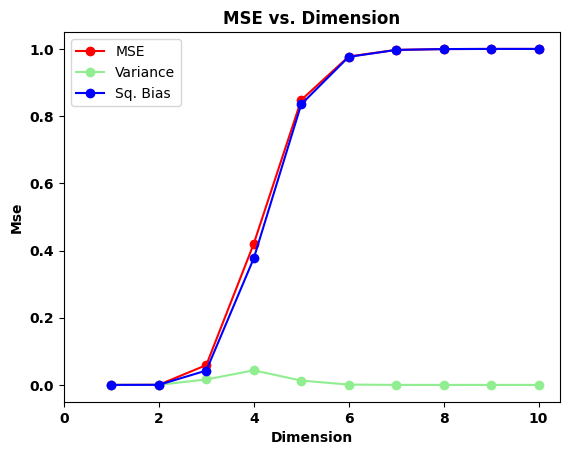

In [202]:
# Define the training samples (T): Here, 80% of the dataset are defined as the trainingset
Training_samples = int(N * 0.8)

# Initialize "y0_hat_mat": The matrix holding all the y0_hat=f(x1) values of size (p x Training_samples)
y0_hat_mat = np.zeros((p,Training_samples))

# Get the index of the minimum value of the columns sum of a 2D-array
def index_sum_col(array2d):
    sum_array = np.sum(np.array(array2d), axis=0) # sum columns (axis=0) of the 2D-array
    return np.where(sum_array == np.min(sum_array))

# Reshape a 2D-array to a 1-D array
def conv_2D_to_1D(y):
    return y.reshape((1,-1))

# Calculate the MSE, VAR and BIAS
for ii in range(Training_samples):
    
    # Generate a uniform distribution
    X = uniform_distribution(p,N)
    
    for jj in range(1,p+1):
        
        x_jj = X[0:jj,:] # extract jj rows from the dataset
        
        x_jj_square = np.square(x_jj) # calculate the square of x_jj_square
        
        position_min_col = index_sum_col(x_jj_square) # extract the position of the min cols-sum value
        
        # Search for the nearest value to the test value "x0=0" using 1-nearest-neighbor
        x1 = x_jj[:,position_min_col] # extract the values of the columns corresponding to min distance

        y0_hat = func(sum(abs(conv_2D_to_1D(x1)[0]))) # Calculate: y0_hat=func(x1)
        
        y0_hat_mat[jj-1,ii] = y0_hat # Store the y0_hat values in a matrix
              
bias_mat = [val - 1 for val in y0_hat_mat] # Calculate: Bias =1-y0_hat

y0_hat_bias = np.mean(bias_mat, axis=1) # Mean of the bias matrix on the rows

y0_hat_var = np.var(y0_hat_mat, axis=1) # Calculate the variance

y0_hat_MSE = y0_hat_var + y0_hat_bias**2 # Calculate the MSE: Mean-Square-Error

# Plotting of the three curves
plt.plot(dimension,y0_hat_MSE, 'bo-', color='red', label="MSE")
plt.plot(dimension,y0_hat_var, 'bo-', color='lightgreen', label="Variance")
plt.plot(dimension,y0_hat_bias**2, 'bo-', color='blue', label="Sq. Bias")

# Add titles, labels and legend
plt.title("MSE vs. Dimension", fontweight="bold")
plt.xlabel("Dimension", fontweight="bold")
plt.ylabel("Mse", fontweight="bold")
plt.legend(loc="upper left")

plt.xticks(np.arange(0, 12, step=2), fontweight="bold") 
plt.yticks(np.arange(0, 1.2, step=0.2), fontweight="bold")
warnings.filterwarnings("ignore")

One can deduce from the above figure (2.7.d) the following:
* In low dimension, the nearest-neighbor is close to the target point. Thus, the bias, variance and MSE are small.
* In high dimension, the nearest-neighbor starts getting far away from the target point. In this case, the MSE and the Bias increase till reaching a unity value. In contrast, the variance starts dropping.
* In this case study, the square bias term is dominant compared to the variance term. However, this is not always the case. This will be shown in the figure (2.8).

### Figure 2.8: A simulation example with the same setup as in Figure 2.7

In this example, we define a cubic function described by the following equation: 
$\boxed{f(X) = \frac{1}{2}\; (X_1 + 1)^3} \,\, \, \, \, \, \,\, \,   \, \, \, \, \, \, \,\, \,  \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,  \, \, \, \,\, \,   \, \, \, \, \, \, \,\, \,  \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,  \, \, \, \,\, \,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \,\,   \, \, \, \, \, \, \,\, \, \,\, \,  \, \, \, \, \,\, \, \, \,\, \, \, \, \, \,  \, \,\, \,  \,\, \, \, \, \, \, \, \,\, \, \, \, \, \, \, \,  \mathbf{(Eq. (1.5))}$

The variation of the function $f(X)$ with respect to the variable $X \in [-1,1]$ is plotted hereunder. It grows exponentially with respect to the $X$ variables.

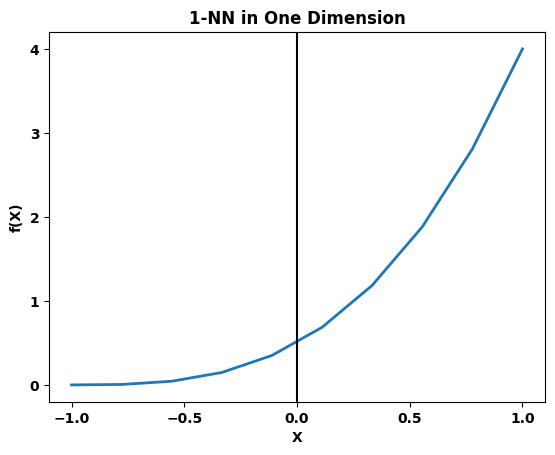

In [4]:
# Define the function of figure (2.8)
def func2(x):
    return 0.5*((x+1)**3)

# Get the index of the minimum value of an array
def index_min_array(nparray):
    return np.where(nparray == abs(nparray).min())

# We count 10 observations in the first curve below
nb_obs_samples = 10
x1 = x[1][0:nb_obs_samples] # First dimension (24 samples)

# Define the minimum value of the array x1
nn = x1[index_min_array(x1)]

# Set the x-axis for the plot (The x values)
xi = np.linspace(-1,1,10)

# Calculate the f(x) function
f_x = [func2(x) for x in xi]

# Plotting
plt.plot(xi,f_x, linewidth=2)    
plt.axvline(x = 0, color = 'black')

# Add titles, labels and legend
plt.title("1-NN in One Dimension", fontweight="bold")
plt.xlabel("X", fontweight="bold")
plt.ylabel("f(X)", fontweight="bold") 

plt.xticks(np.arange(-1, 1.5, step=0.5), fontweight="bold") 
plt.yticks(np.arange(0, 5, step=1), fontweight="bold")
warnings.filterwarnings("ignore")

# Plot the rugs
# fig = px.histogram(x=x1, marginal='rug')
# fig.show()

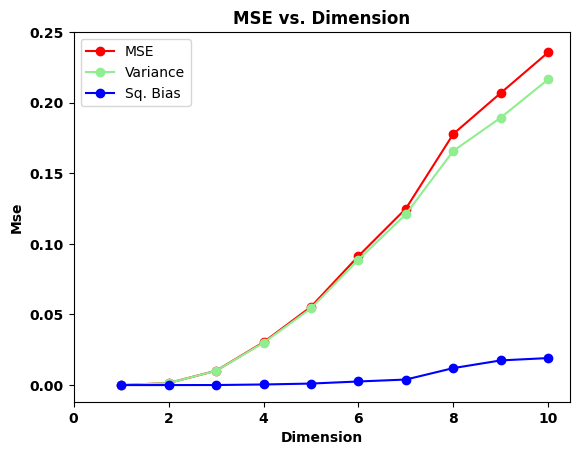

In [205]:
# Define the training samples (T)
Training_samples2 = int(N * 1)

# Initialize "y0_hat_mat": The matrix holding all the y0_hat=f(x1) values of size (p x Training_samples)
y0_hat_mat2 = np.zeros((p,Training_samples2))

# Calculate the MSE, VAR and BIAS
for ii in range(Training_samples2):
    
    # Generate a uniform distribution
    X2 = uniform_distribution(p,N)
    
    for jj in range(1,p+1):
        
        x_jj2 = X2[0:jj,:] # extract jj rows from the dataset
        
        x_jj_square2 = np.square(x_jj2) # calculate the square of x_jj_square
        
        position_min_col2 = index_sum_col(x_jj_square2) # extract the position of the min cols-sum value
        
        # Search for the nearest value to the test value "x0=0" using 1-nearest-neighbor
        x12 = x_jj2[:,position_min_col2] # extract the values of the columns corresponding to min distance

        y0_hat2 = func2(x12[0])
        
        y0_hat_mat2[jj-1,ii] = y0_hat2 # Store the y0_hat values in a matrix
              
bias_mat2 = [(val - 0.5) for val in y0_hat_mat2] # Calculate the Bias (f(x0=0)=0.5)

y0_hat_bias2 = np.mean(bias_mat2, axis=1) # Mean of the bias matrix on the rows

y0_hat_var2 = np.var(y0_hat_mat2, axis=1) # Calculate the variance

y0_hat_MSE2 = y0_hat_var2 + y0_hat_bias2**2 # Calculate the MSE: Mean-Square-Error

# Plotting of the three curves
plt.plot(dimension,y0_hat_MSE2, 'bo-', color='red', label="MSE")
plt.plot(dimension,y0_hat_var2, 'bo-', color='lightgreen', label="Variance")
plt.plot(dimension,y0_hat_bias2**2, 'bo-', color='blue', label="Sq. Bias")

# Add titles, labels and legend
plt.title("MSE vs. Dimension", fontweight="bold")
plt.xlabel("Dimension", fontweight="bold")
plt.ylabel("Mse", fontweight="bold")
plt.legend(loc="upper left")

plt.xticks(np.arange(0, 12, step=2), fontweight="bold") 
plt.yticks(np.arange(0, 0.3, step=0.05), fontweight="bold")
warnings.filterwarnings("ignore")

In this figure above, unlike in the previous example of figure (2.7), the variance increases exponentially with respect to the dimension $p$ and so does the MSE. The variance term is dominant in this case, unlike the previous case study, where the square-bias term is dominant.

### Figure 2.9: Expected Prediction Error of 1NN vs. OLS

Considering a sample size $N$ equal to $500$, this case study shows the expected prediction error (EPE) at a test point $x_0=0$ for the ratio of the 1-nearest-neighbor over the least-square-error of the model presenting a noise $\epsilon$ (generated using the standard Normal distribution $N(0,1)$), where $Y = f(X) + \epsilon$. Here, two functions $f(X)$ are compared, such as:
* A linear function: $f(x) = x_1$ represented in orange
* A cubic function: $f(x) = \frac{1}{2}(x_1 + 1)^3$ represented in blue.

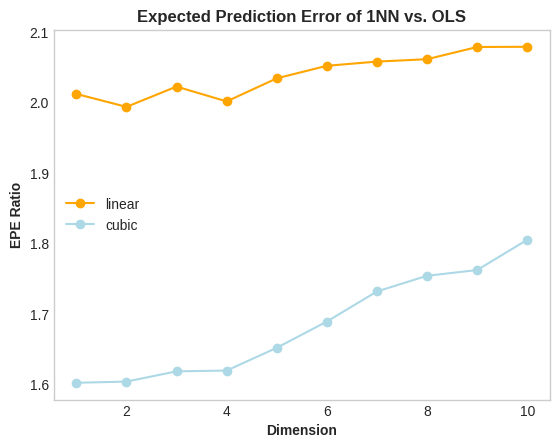

In [131]:
import scipy.linalg as sl

# Define the sample size N
N = 500

# The curves are averaged over the number of simulations
simul = 100000

# Define the dimension p
p = 10
dimension = np.linspace(1,p,num=p)

# Get the index of the minimum value of the columns sum of a 2D-array
def index_sum_col(array2d):
    sum_array = np.sum(np.array(array2d), axis=0) # sum columns (axis=0) of the 2D-array
    return np.where(sum_array == np.min(sum_array))[0][0]

# Define the error (epsilon)
def epsilon(samples):
    return np.random.standard_normal(samples) # The samples are the number of the introduced training samples

# Define the linear function (colored in orange)
def func_linear(data_array,error_array):
    return (data_array + error_array)

# Define the cubic function (colored in blue)
def func_cubic(data_array,error_array):
    return (0.5 * (data_array + 1)**3 + error_array)

# Define the least square error function
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
def LSE(arrayX,arrayY,y_exact):
    coefficient_matrix = np.vstack([arrayX, np.ones(len(arrayX))]).T
    slope,intercept = np.linalg.lstsq(coefficient_matrix, arrayY, rcond=None)[0]
    return (y_exact - intercept)**2

# Define the error using the 1-nearest-neighbor (1NN)
def err_nn1(x,y,y0):
    return (y0-y[index_sum_col(x*x)])**2
                 
#
EPE_func_linear = []
EPE_func_cubic = []
for i in range(1,p+1):
    
    # Initialization
    LSE_linear,LSE_cubic=0,0
    NN1_linear_err,NN1_cubic_err=0,0
    
    for j in range(simul):        
        # Define an error epsilon
        epsi = epsilon(N)
        
        # Define a dataset of size (pxN)
        X = uniform_distribution(i,N)
        
        # Determine the f(X) of both linear and cubic functions
        Y_linear = func_linear(X[0,:],epsi) # Here, we are only interested in "x1"
        Y_cubic = func_cubic(X[0,:],epsi)   # Here, we are only interested in "x1"
        
        # Define the exact solution
        x0 = np.zeros(i) # x0 = 0
        y0_linear = np.random.standard_normal()  # f(x0) for x0 = 0
        y0_cubic = 0.5 + np.random.standard_normal()  # f(x0) for x0 = 0
        
        # Calculate the least square error
        LSE_linear += LSE(X[0,:],Y_linear,y0_linear)
        LSE_cubic += LSE(X[0,:],Y_cubic,y0_cubic)
        
        # Calculate the error using the 1-nearest-neighbor (1NN)
        NN1_linear_err += err_nn1(X,Y_linear,y0_linear)
        NN1_cubic_err += err_nn1(X,Y_cubic,y0_cubic)
        
    # Calculate the EPE ratio
    EPE_func_linear.append(NN1_linear_err/LSE_linear)
    EPE_func_cubic.append(NN1_cubic_err/LSE_cubic)

# Plotting
plt.plot(dimension,EPE_func_linear, 'bo-', color='orange', label='linear')
plt.plot(dimension,EPE_func_cubic, 'bo-', color='lightblue', label='cubic')
plt.legend(loc='center left')

plt.title("Expected Prediction Error of 1NN vs. OLS", fontweight="bold")
plt.xlabel('Dimension', fontweight="bold")
plt.ylabel('EPE Ratio', fontweight="bold")
plt.grid(False)

plt.show()

From the figure above, one can conclude the following:

* For the linear function: The expected prediction error at $x_0=0$ is above the value $2$ because the variance of $\hat{y_0}$ is at least $\sigma^2$. The EPE ratio increases with the dimension since the 1NN gets farther from the target point,

* For the cubic function: In this case, the least-quare is biased, unlike the linear function where the least-quare is unbiased. In this case as well, the EPE ratio increases with the dimension.

## Exercise 2: Comparison between 5-Fold CV and LOOCV <a id='ex2'></a>

The aim of this exercise is to estimate the model accuracy using both: (a) 5-Fold Cross Validation, and (b) Leave One Out Cross Validation (LOOCV) on a provided sonar dataset. Afterwards, a comparison between both CV methods will be conducted considering the entire dataset, then different portions of it. At the end, conclusions will be drawn.

First, we will start by importing the necessary libraries, as follows.

In [21]:
# Import necessary libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

### Loading of the sonar dataset

The sonar dataset aims to classify the sonar signals into [2.1](https://datahub.io/machine-learning/sonar%23resource-sonar#readme): 
* $\mathbf{"R"}$ if the signal is reflected from a metal cylinder,
* $\mathbf{"M"}$ if the signal is reflected from a roughly cylindrical rock. 

The dataset is read from a ".csv" file and contains $207$ patterns (rows) obtained either by reflecting a sonar signal from a metal cylinder or a roughly cylindrical rock (frequency-modulated). Each pattern has 60 values (columns) from $0$ to $1$, which represent the integration over time of the energy corresponding to a certain frequency band and sorted in an  ascending order of aspect angle.

In [2]:
# Import time-series dataset from GitHub (Read times in date format)
data_url = 'https://raw.githubusercontent.com/Chaichas/Project/main/sonar.csv'
sonar_dataset = pd.read_csv(data_url, sep=',',index_col=0, parse_dates=True)
print("The sonar data shape: ", sonar_dataset.shape)

The sonar data shape:  (207, 60)


Hereunder, the dataset is divided into features "X" and target "Y".

In [3]:
# Get the target "y"
Y = sonar_dataset.iloc[:,-1]

# Get the data X
X = sonar_dataset.iloc[:,:-1]

print("Shape of X:", X.shape, "; Shape of Y: ", Y.shape)
print("========================")
print("Y value counts ")
print("========================")
Y.value_counts()

Shape of X: (207, 59) ; Shape of Y:  (207,)
Y value counts 


M    111
R     96
Name: R, dtype: int64

The sonar dataset target gathers $111$ patterns of mines "M" and $96$ patterns of rocks "R", with a total of $207$ patterns.

###  (a) Comparison of the performance of LOOCV with 5-fold CV

In what follows, we will be comparing both the LOOCV (LeaveOutOut Cross Validation) and the 5-Fold CV (5-Fold Cross Validation). The cross validation plays a main role in making the model less biased and less optimistic by trying different combinations of train- and test- sets.

#### Implementation of 5-fold cross validation (CV)

The main idea behind the "K-Fold" is to divide or split the dataset into $K$ different subsets, where $K-1$ subsets represent the trainset and one subset represents the testset. This could be illustrated in figure (2.1).

The steps to do a 5-fold cv are described below:
1. Shuffling the dataset randomly. This could be done by setting "shuffle" to "True" in the "KFold" function. 
2. Choosing the adequate K to do the k-fold cv. In our case $K=5$. The dataset is then splitted into $K-1 =4$ folds representing the trainset and $1$ fold representing the testset.
3. The average accuracy is the average of the iterations. In our case it represents the means of the five iterations.

<!-- 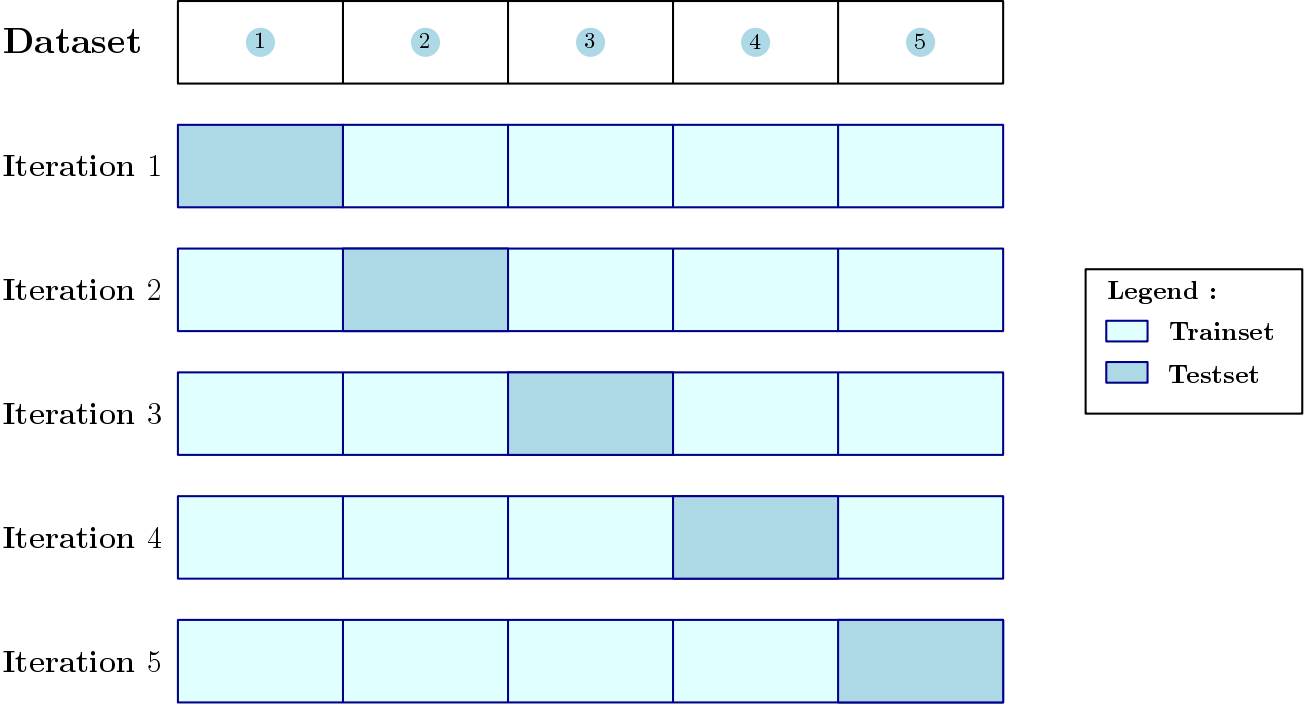 -->
<div>
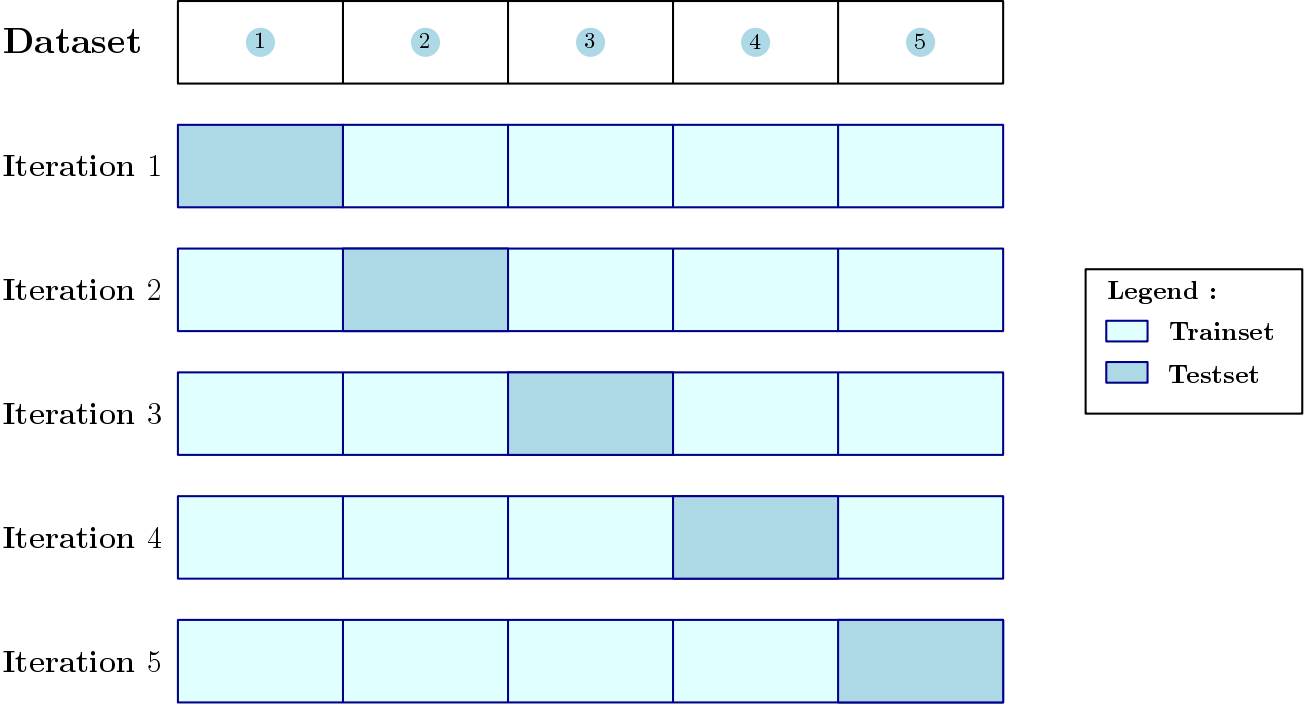
</div>

**Figure 2.1: Illustration of the 5-fold cross validation.**

In [12]:
# Create a 5-Fold object
# Here we have a "207/5 = 41.4" for each test fold (41-42) => The testset represents 20% of the total data
f5 = KFold(n_splits=5, shuffle=True, random_state=1)

# Divide the dataset into trainset and testset
iter = 1
for trainset, testset in f5.split(X,Y):
    # 
    print("========================")
    print("Iteration: ", iter)
    print("========================")
    X_train_cv, X_test_cv = X.iloc[trainset], X.iloc[testset]
    Y_train_cv, Y_test_cv = Y.iloc[trainset], Y.iloc[testset]
    print("Shape of the X_traincv: ", X_train_cv.shape, "Shape of the X_testcv: ", X_test_cv.shape)
    iter += 1

Iteration:  1
Shape of the X_traincv:  (165, 59) Shape of the X_testcv:  (42, 59)
Iteration:  2
Shape of the X_traincv:  (165, 59) Shape of the X_testcv:  (42, 59)
Iteration:  3
Shape of the X_traincv:  (166, 59) Shape of the X_testcv:  (41, 59)
Iteration:  4
Shape of the X_traincv:  (166, 59) Shape of the X_testcv:  (41, 59)
Iteration:  5
Shape of the X_traincv:  (166, 59) Shape of the X_testcv:  (41, 59)


In order to fit the model, the "random forest classifier" [2.2](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), which is an ensemble classification algorithm involving many decision trees in the training process in order to improve the accuracy of the model [2.3](https://refactored.ai/microcourse/notebook?path=content%2F06-Classification_models_in_Machine_Learning%2F06-Random_Forests%2F01-Random_Forests_and_Ensemble_Models.ipynb).

In [13]:
# Model fitting using the "RandomForestClassifier"
rf = RandomForestClassifier(n_estimators=30, random_state=0)

score_rf=[]
for trainset, testset in f5.split(X,Y):
    # Model training
    rf.fit(X_train_cv, Y_train_cv)
    # Model scoring
    score_rf.append(rf.score(X_test_cv, Y_test_cv))
    score_std = np.array(score_rf).std()

print("The score average following the 5-fold cv: ", np.mean(score_rf))
print("The score std: ", score_std)

The score average following the 5-fold cv:  0.9512195121951219
The score std:  0.0


In [14]:
# Compute the time (5-fold cv)
begin_f5 = time.time()
result_f5 = cross_val_score(estimator=rf, X=X, y=Y, scoring='accuracy', cv=f5)
end_f5 = time.time()
print("The time elapsed (in sec): ", end_f5 - begin_f5)

The time elapsed (in sec):  0.14809727668762207


#### Implementation of the LOOCV (Leave One Out Cross-Validation)

In the LeaveOneOut method, we set the value of $K$ equal to $N$, where $N$ is the number of the data samples. In our case, we have $207$ patterns, and thus $K=N=207$ in this particular case of cv. It is performed by referring to the following steps:
1. The number of folds is set equal to the number of observations.
2. All folds are averaged to be able to build the model.
3. The model is tested against the last fold.

In case the training sets are large, this method becomes expensive in terms of computational time, since the number of folds would be always equal to the number of samples. 

In [16]:
# Here, there is no need to split
loocv = LeaveOneOut()
loocv.get_n_splits(X) # we have 207 iterations equal to the number of patterns

# Divide the dataset into trainset and testset
iter = 1
for trainset, testset in loocv.split(X=X):
    print("========================")
    print("Iteration: ", iter)
    print("========================")
    X_train_cv, X_test_cv = X.iloc[trainset], X.iloc[testset]
    Y_train_cv, Y_test_cv = Y.iloc[trainset], Y.iloc[testset]
    print("Shape of the X_traincv: ", X_train_cv.shape, "Shape of the X_testcv: ", X_test_cv.shape)
    iter += 1


Iteration:  1
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  2
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  3
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  4
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  5
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  6
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  7
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  8
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  9
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  10
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  11
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  12
Shape of the X_traincv:  (206, 59) Shape of the X_testcv:  (1, 59)
Iteration:  13
Shape of t

Similarly, the "random forest classifier" is used to fit the model, as given hereunder.

In [17]:
# Model fitting using the "RandomForestClassifier"
rf = RandomForestClassifier(n_estimators=30, random_state=0)

score_loocv=[]
for trainset, testset in loocv.split(X,Y):
    # Model training
    rf.fit(X_train_cv, Y_train_cv)
    # Model scoring
    score_loocv.append(rf.score(X_test_cv, Y_test_cv))
    score_std = np.array(score_rf).std()

print("The score average following the loocv: ", np.mean(score_loocv))
print("The score std: ", score_std)

The score average following the loocv:  1.0
The score std:  0.0


In [21]:
# Compute the time (loocv)
begin_loocv = time.time()
result_loocv = cross_val_score(estimator=rf, X=X, y=Y, scoring='accuracy', cv=loocv)
end_loocv = time.time()
print("The time elapsed (in sec): ", end_loocv - begin_loocv)

The time elapsed (in sec):  6.089403867721558


#### Conclusions regarding the comparison of 5-fold cv and loocv:

* **Regarding the accuracy:** The loocv algorithm uses more training samples in every iteration compared to the 5-fold cv. Thus, the model can learn better. This is represented by the "average score" metric, where the mean of the folds scores for the loocv is higher than the one of the 5-fold cv. 

* **Regarding the computing time:** The 5-fold cv algorithm is faster when it comes to computational time. This is predictable since there are only $K=5$ iterations in the case of the 5-fold cv, but $K=207$ iterations in the case of the loocv, which is equal to the data samples size. This is demonstrated by the "time" metric where the results show that: $time\;(5-fold\; cv) = 0.148 sec < time\;(loocv) = 6.089 sec$ (a speed-up of $41.14$ which is approximately equal to $\frac{N=207}{K=5}$).

###  (b) Effect of the data size on the comparison


In this section, we will be running with different data sizes as illustrated in the table below.

| Data percentage| Number of data samples|  
| --- | --- |
| 25% | 51.75 $\approx$ 52|
| 50% | 103.5 $\approx$ 104|
| 75% | 155.25 $\approx$ 155 |

The effect of the data size on the loocv and 5-fold cv will be investigated hereunder.

#### (b.1) 5-fold cv implementation for (25%, 50%, 75%) of the data

When it comes to splitting the dataset, one has to make sure that the target vector "Y" contains both sonar signals classes "R" and "M".

In [5]:
############################################ 25% of the data ############################################
# Get the target "Y_25"
Y_25 = sonar_dataset.iloc[85:137, -1]

# Get the data "X_25"
X_25 =  sonar_dataset. iloc[85:137, :-1]

print("Shape of X:", X_25.shape, "; Shape of Y: ", Y_25.shape)
print("========================")
print("Y_25 value counts ")
print("========================")
Y_25.value_counts()

Shape of X: (52, 59) ; Shape of Y:  (52,)
Y_25 value counts 


M    41
R    11
Name: R, dtype: int64

In [6]:
############################################ 50% of the data ############################################
# Get the target "Y_50"
Y_50 = sonar_dataset.iloc[59:163, -1]

# Get the data "X_50"
X_50 =  sonar_dataset. iloc[59:163, :-1]

print("Shape of X:", X_50.shape, "; Shape of Y: ", Y_50.shape)
print("========================")
print("Y_50 value counts ")
print("========================")
Y_50.value_counts()

Shape of X: (104, 59) ; Shape of Y:  (104,)
Y_50 value counts 


M    67
R    37
Name: R, dtype: int64

In [7]:
############################################ 75% of the data ############################################
# Get the target "Y_75"
Y_75 = sonar_dataset.iloc[33:188, -1]

# Get the data "X_75"
X_75 =  sonar_dataset. iloc[33:188, :-1]

print("Shape of X:", X_75.shape, "; Shape of Y: ", Y_75.shape)
print("========================")
print("Y_75 value counts ")
print("========================")
Y_75.value_counts()

Shape of X: (155, 59) ; Shape of Y:  (155,)
Y_75 value counts 


M    92
R    63
Name: R, dtype: int64

In [77]:
############################################ 5-Fold CV ############################################
# Create a 5-Fold object
f5 = KFold(n_splits=5, shuffle=True, random_state=1)

# Divide the dataset into trainset and testset
# 25% of the data
iter_25 = 1
for train_25, test_25 in f5.split(X_25,Y_25):    
    X_25_train_cv, X_25_test_cv = X_25.iloc[train_25], X_25.iloc[test_25]  
    Y_25_train_cv, Y_25_test_cv = Y_25.iloc[train_25], Y_25.iloc[test_25] 
    iter_25 += 1

# 50% of the data
iter_50 = 1
for train_50, test_50 in f5.split(X_50,Y_50):
    X_50_train_cv, X_50_test_cv = X_50.iloc[train_50], X_50.iloc[test_50]
    Y_50_train_cv, Y_50_test_cv = Y_50.iloc[train_50], Y_50.iloc[test_50]
    iter_50 += 1

# 75% of the data
iter_75 = 1
for train_75, test_75 in f5.split(X_75,Y_75):
    X_75_train_cv, X_75_test_cv = X_75.iloc[train_75], X_75.iloc[test_75]
    Y_75_train_cv, Y_75_test_cv = Y_75.iloc[train_75], Y_75.iloc[test_75]
    iter_75 += 1
    
################################# Model fitting: RandomForestClassifier #################################
# Create a RandomForestClassifier object
rf_data = RandomForestClassifier(n_estimators=30, random_state=0)

score_rf_25=[]
score_rf_50=[]
score_rf_75=[]

# 25% of the data
for train_25, test_25 in f5.split(X_25,Y_25):
    # Model fitting
    rf_25 = rf_data.fit(X_25_train_cv, Y_25_train_cv)
    # Model scoring
    score_rf_25.append(rf_25.score(X_25_test_cv, Y_25_test_cv))
    # Check the standard-deviation
    score_std_25 = np.array(score_rf_25).std()
    
# 50% of the data
for train_50, test_50 in f5.split(X_50,Y_50):
    # Model fitting
    rf_50 = rf_data.fit(X_50_train_cv, Y_50_train_cv)
    # Model scoring
    score_rf_50.append(rf_50.score(X_50_test_cv, Y_50_test_cv))
    # Check the standard-deviation
    score_std_50 = np.array(score_rf_50).std()
    
# 75% of the data
for train_75, test_75 in f5.split(X_75,Y_75):
    # Model fitting
    rf_75 = rf_data.fit(X_75_train_cv, Y_75_train_cv)
    # Model scoring
    score_rf_75.append(rf_75.score(X_75_test_cv, Y_75_test_cv))
    # Check the standard-deviation
    score_std_75 = np.array(score_rf_75).std()
    
print("The average score of 5-fold cv in case of 25% of data: ", np.mean(score_rf_25))
print("The average score of 5-fold cv in case of 50% of data: ", np.mean(score_rf_50))
print("The average score of 5-fold cv in case of 75% of data: ", np.mean(score_rf_75))
print("The score std: ", "## 25% of data: ", score_std_25, "; ## 50% of data: ", score_std_50, 
      "; ## 75% of data: ", score_std_75)

The average score of 5-fold cv in case of 25% of data:  0.8
The average score of 5-fold cv in case of 50% of data:  0.8
The average score of 5-fold cv in case of 75% of data:  0.8387096774193548
The score std:  ## 25% of data:  0.0 ; ## 50% of data:  0.0 ; ## 75% of data:  1.1102230246251565e-16


In [80]:
# Compute the time (5-fold cv)
# 25% of the data
start_25 = time.time()
result_25 = cross_val_score(estimator=rf_data, X=X_25, y=Y_25, scoring='accuracy', cv=f5)
end_25 = time.time()
print("The time elapsed (in sec) in case of 25% of data: ", end_25 - start_25)

# 50% of the data
start_50 = time.time()
result_50 = cross_val_score(estimator=rf_data, X=X_50, y=Y_50, scoring='accuracy', cv=f5)
end_50 = time.time()
print("The time elapsed (in sec) in case of 50% of data: ", end_50 - start_50)

# 75% of the data
start_75 = time.time()
result_75 = cross_val_score(estimator=rf_data, X=X_75, y=Y_75, scoring='accuracy', cv=f5)
end_75 = time.time()
print("The time elapsed (in sec) in case of 75% of data: ", end_75 - start_75)

The time elapsed (in sec) in case of 25% of data:  0.09991312026977539
The time elapsed (in sec) in case of 50% of data:  0.10655021667480469
The time elapsed (in sec) in case of 75% of data:  0.11330938339233398


#### (b.2) loocv implementation for (25%, 50%, 75%) of the data

In [46]:
############################################ loocv ############################################
# Here, there is no need to split
loocv_25 = LeaveOneOut()
loocv_25.get_n_splits(X_25)

# Divide the dataset into trainset and testset
# 25% of the data
iter_25 = 1
for train_25, test_25 in loocv_25.split(X=X_25):
    X_25_train_cv, X_25_test_cv = X_25.iloc[train_25], X_25.iloc[test_25]
    Y_25_train_cv, Y_25_test_cv = Y_25.iloc[train_25], Y_25.iloc[test_25]
    iter_25 += 1

# 50% of the data
loocv_50 = LeaveOneOut()
loocv_50.get_n_splits(X_50)

iter_50 = 1
for train_50, test_50 in loocv_50.split(X=X_50):
    X_50_train_cv, X_50_test_cv = X_50.iloc[train_50], X_50.iloc[test_50]
    Y_50_train_cv, Y_50_test_cv = Y_50.iloc[train_50], Y_50.iloc[test_50]
    iter_50 += 1
    
# 75% of the data
loocv_75 = LeaveOneOut()
loocv_75.get_n_splits(X_75)

iter_75 = 1
for train_75, test_75 in loocv_75.split(X=X_75):
    X_75_train_cv, X_75_test_cv = X_75.iloc[train_75], X_75.iloc[test_75]
    Y_75_train_cv, Y_75_test_cv = Y_75.iloc[train_75], Y_75.iloc[test_75]
    iter_75 += 1
    
################################# Model fitting: RandomForestClassifier #################################
# Create a RandomForestClassifier object
rf_loocv = RandomForestClassifier(n_estimators=30, random_state=0)

score_loocv_25=[]
score_loocv_50=[]
score_loocv_75=[]

# 25% of the data
for train_25, test_25 in loocv_25.split(X_25,Y_25):
    # Model training
    rf_loocv.fit(X_25_train_cv, Y_25_train_cv)
    # Model scoring
    score_loocv_25.append(rf_loocv.score(X_25_test_cv, Y_25_test_cv))
    score_std_25 = np.array(score_loocv_25).std()
    
# 50% of the data
model = RandomForestClassifier(random_state=1)
for train_50, test_50 in loocv_50.split(X_50,Y_50):
    # Model training
    model.fit(X_50_train_cv, Y_50_train_cv)
    # Model scoring
    score_loocv_50.append(model.score(X_50_test_cv, Y_50_test_cv))
    score_std_50 = np.array(score_loocv_50).std()

# 75% of the data
for train_75, test_75 in loocv_75.split(X_75,Y_75):
    # Model training
    rf_loocv.fit(X_75_train_cv, Y_75_train_cv)
    # Model scoring
    score_loocv_75.append(rf_loocv.score(X_75_test_cv, Y_75_test_cv))
    score_std_75 = np.array(score_loocv_75).std()

print("The average score of loocv in case of 25% of data: ", np.mean(score_loocv_25))
print("The average score of loocv in case of 50% of data: ", np.mean(score_loocv_50))
print("The average score of loocv in case of 75% of data: ", np.mean(score_loocv_75))
print("The score std: ", "## 25% of data: ", score_std_25, "; ## 50% of data: ", score_std_50, 
      "; ## 75% of data: ", score_std_75)

The average score of loocv in case of 25% of data:  1.0
The average score of loocv in case of 50% of data:  1.0
The average score of loocv in case of 75% of data:  1.0
The score std:  ## 25% of data:  0.0 ; ## 50% of data:  0.0 ; ## 75% of data:  0.0


In [93]:
# Compute the time (loocv)
# 25% of the data
start_loocv_25 = time.time()
result_loocv_25 = cross_val_score(estimator=rf_loocv, X=X_25, y=Y_25, scoring='accuracy', cv=loocv_25)
end_loocv_25 = time.time()
print("The time elapsed (in sec) in case of 25% of data: ", end_loocv_25 - start_loocv_25)

# 50% of the data
start_loocv_50 = time.time()
result_loocv_50 = cross_val_score(estimator=rf_loocv, X=X_50, y=Y_50, scoring='accuracy', cv=loocv_50)
end_loocv_50 = time.time()
print("The time elapsed (in sec) in case of 50% of data: ", end_loocv_50 - start_loocv_50)

# 75% of the data
start_loocv_75 = time.time()
result_loocv_75 = cross_val_score(estimator=rf_loocv, X=X_75, y=Y_75, scoring='accuracy', cv=loocv_75)
end_loocv_75 = time.time()
print("The time elapsed (in sec) in case of 75% of data: ", end_loocv_75 - start_loocv_75)

The time elapsed (in sec) in case of 25% of data:  1.0138046741485596
The time elapsed (in sec) in case of 50% of data:  2.279236316680908
The time elapsed (in sec) in case of 75% of data:  3.7551777362823486


#### (b.3) Comparison of 5-fold cv and loocv for (25%, 50%, 75%) of the data

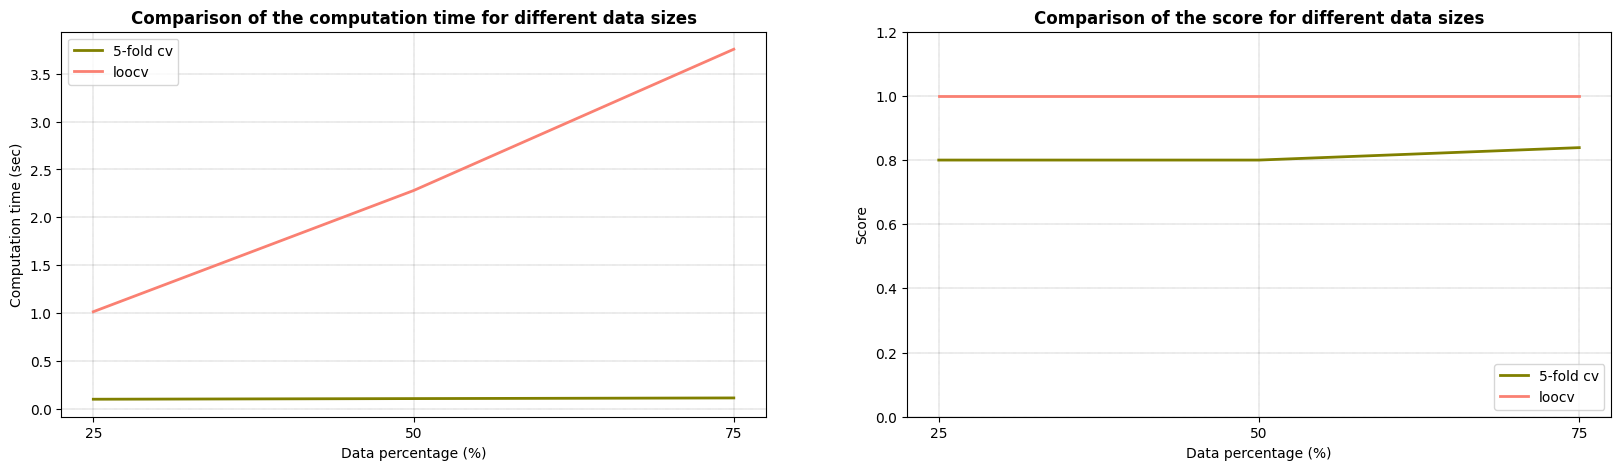

In [123]:
# Plotting and comparison
# 5-Fold cv
fold_5_cv_score = [0.8, 0.8, 0.8387096774193548]
fold_5_cv_time = [0.09991312026977539, 0.10655021667480469, 0.11330938339233398]

# loocv
loocv_score = [1, 1, 1]
loocv_time = [1.0138046741485596, 2.279236316680908, 3.7551777362823486]

data_percentage = [25, 50, 75]

#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

# Computation time comparison
fig1 = ax1.plot(data_percentage, fold_5_cv_time, linewidth=2, color='olive', label='5-fold cv')
fig2 = ax1.plot(data_percentage, loocv_time, linewidth=2, color='salmon', label='loocv')
ax1.set_title('Comparison of the computation time for different data sizes',fontweight="bold")
ax1.set(xlabel='Data percentage (%)', ylabel='Computation time (sec)')
ax1.legend(['5-fold cv', 'loocv'])
ax1.set_xticks(np.arange(25, 100, 25))
ax1.grid(color='black', linestyle='--', linewidth=0.15)

# Score comparison
fig3 = ax2.plot(data_percentage, fold_5_cv_score, linewidth=2, color='olive', label='5-fold cv')
fig4 = ax2.plot(data_percentage, loocv_score, linewidth=2, color='salmon', label='loocv')
ax2.set_title('Comparison of the score for different data sizes',fontweight="bold")
ax2.set(xlabel='Data percentage (%)', ylabel='Score')
ax2.legend(['5-fold cv', 'loocv'], loc='lower right')
ax2.set_xticks(np.arange(25, 100, 25))
ax2.set_yticks(np.arange(0, 1.25, 0.2))
ax2.grid(color='black', linestyle='--', linewidth=0.15)

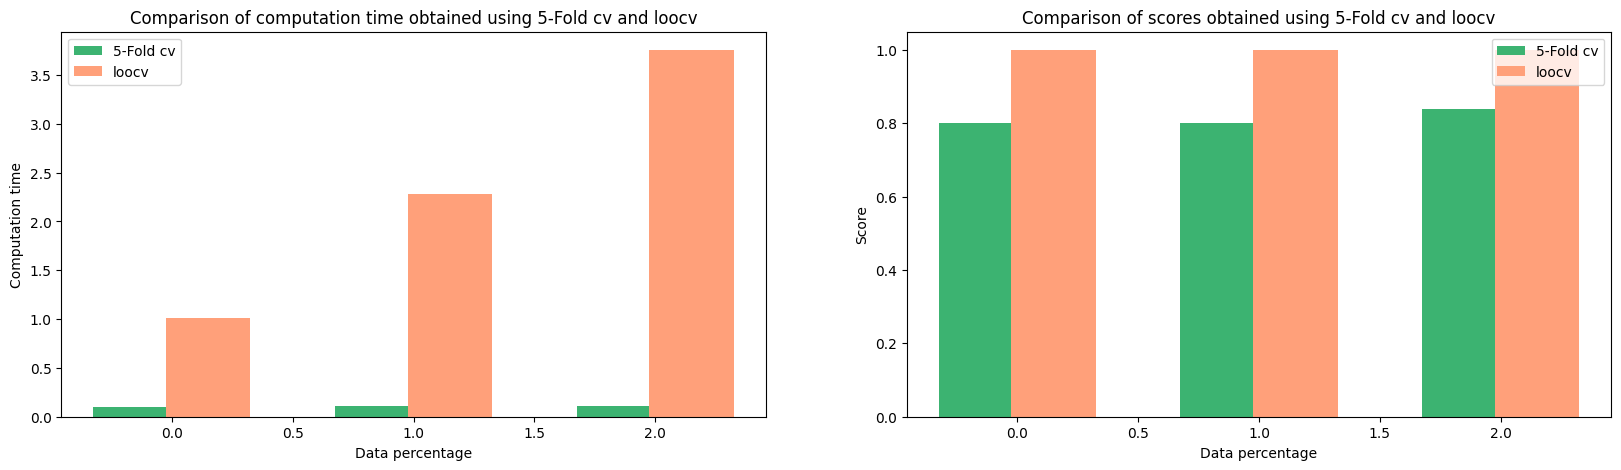

In [46]:
# Plotting using bars
# 5-Fold cv
fold_5_cv_score = [0.8, 0.8, 0.8387096774193548]
fold_5_cv_time = [0.09991312026977539, 0.10655021667480469, 0.11330938339233398]

# loocv
loocv_score = [1, 1, 1]
loocv_time = [1.0138046741485596, 2.279236316680908, 3.7551777362823486]

data_percentage = ['25', '50', '75']
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

# Computation time comparison  
X = np.arange(3)  
ax1.bar(X - 0.15, fold_5_cv_time, 0.35, label = '5-Fold cv', color ='mediumseagreen')
ax1.bar(X + 0.15, loocv_time, 0.35, label = 'loocv', color ='lightsalmon')
ax1.legend(labels=['5-Fold cv', 'loocv'])
ax1.set_xlabel('Data percentage')
ax1.set_ylabel('Computation time')
ax1.set_title('Comparison of computation time obtained using 5-Fold cv and loocv')

# Score comparison 
ax2.bar(X - 0.15, fold_5_cv_score, 0.35, label = '5-Fold cv', color ='mediumseagreen')
ax2.bar(X + 0.15, loocv_score, 0.35, label = 'loocv', color ='lightsalmon')
ax2.legend(labels=['5-Fold cv', 'loocv'])
ax2.set_xlabel('Data percentage')
ax2.set_ylabel('Score')
ax2.set_title('Comparison of scores obtained using 5-Fold cv and loocv')
plt.show()

Following the comparison between the 5-fold cv and loocv algorithms for different data sizes, we conduct the following conclusions:

* **Regarding the accuracy:** The loocv algorithm uses more training samples in every iteration compared to the 5-fold cv (the model can learn better). The number of iterations is equal to the size of the data each time. The "average score" metric, measure of the accuracy, is always maximum for the three cases where the data size varies from $25\%$ to $75\%$ for the loocv algorithm, as illustrated in the above right figure. However, in the case of the 5-fold cv, the accuracy is lower than the loocv, since we have only $5$ iterations for each data size. Moreover, it is slightly increased in the case where the data size is equal to $75\%$ the initial one.


* **Regarding the computing time:** The 5-fold cv algorithm is faster when it comes to computational time. This is predictable since there are only $K=5$ iterations in the case of the 5-fold cv, but a number of iterations equal to the number of data samples in the case of the loocv. The "time" metric, measure of the computational time, is lower for the 5-fold cv compared to the loocv, as illustrated in the above left figure. However, it increases as we increase the size of the data samples, and thus the training set.

###  (c) Effect of having one small data class on the comparison

In this section, we will consider the effect of having a smaller dataset of the classe "M". Giving the fact that the total number of the patterns belonging to  this class is $111$, a variation going from $25\%$ to $75\%$ of this total pattern number will be performed, as presented in the table below.

| Data percentage| Number of data samples "M"|  
| --- | --- |
| 25% | 27.75 $\approx$ 28|
| 50% | 55.5 $\approx$ 56|
| 75% | 83.25 $\approx$ 83 |

The effect of having one small data class on the loocv and 5-fold cv will be investigated hereunder.


In [4]:
############################################ 25% of the data "M" ############################################
# Get the target "Y_M_25"
Y_M_25 = sonar_dataset.iloc[:124, -1]

# Get the data "X_M_25"
X_M_25 =  sonar_dataset.iloc[:124, :-1]

print("Shape of X:", X_M_25.shape, "; Shape of Y: ", Y_M_25.shape)
print("========================")
print("Y_M_25 value counts ")
print("========================")
Y_M_25.value_counts()

Shape of X: (124, 59) ; Shape of Y:  (124,)
Y_M_25 value counts 


R    96
M    28
Name: R, dtype: int64

In [5]:
############################################ 50% of the data "M" ############################################
# Get the target "Y_M_50"
Y_M_50 = sonar_dataset.iloc[:152, -1]

# Get the data "X_M_50"
X_M_50 =  sonar_dataset.iloc[:152, :-1]

print("Shape of X:", X_M_50.shape, "; Shape of Y: ", Y_M_50.shape)
print("========================")
print("Y_M_50 value counts ")
print("========================")
Y_M_50.value_counts()

Shape of X: (152, 59) ; Shape of Y:  (152,)
Y_M_50 value counts 


R    96
M    56
Name: R, dtype: int64

In [6]:
############################################ 75% of the data "M" ############################################
# Get the target "Y_M_75"
Y_M_75 = sonar_dataset.iloc[:179, -1]

# Get the data "X_M_75"
X_M_75 =  sonar_dataset.iloc[:179, :-1]

print("Shape of X:", X_M_75.shape, "; Shape of Y: ", Y_M_75.shape)
print("========================")
print("Y_M_75 value counts ")
print("========================")
Y_M_75.value_counts()

Shape of X: (179, 59) ; Shape of Y:  (179,)
Y_M_75 value counts 


R    96
M    83
Name: R, dtype: int64

#### (c.1) 5-fold cv implementation for (25%, 50%, 75%) of the dataset "M"

In [13]:
############################################ 5-Fold CV ############################################
# Create a 5-Fold object
f5 = KFold(n_splits=5, shuffle=True, random_state=1)

# Divide the dataset into trainset and testset
# 25% of the data
for train_M_25, test_M_25 in f5.split(X_M_25,Y_M_25):    
    X_M_25_train_cv, X_M_25_test_cv = X_M_25.iloc[train_M_25], X_M_25.iloc[test_M_25]  
    Y_M_25_train_cv, Y_M_25_test_cv = Y_M_25.iloc[train_M_25], Y_M_25.iloc[test_M_25] 

# 50% of the data
for train_M_50, test_M_50 in f5.split(X_M_50,Y_M_50):
    X_M_50_train_cv, X_M_50_test_cv = X_M_50.iloc[train_M_50], X_M_50.iloc[test_M_50]
    Y_M_50_train_cv, Y_M_50_test_cv = Y_M_50.iloc[train_M_50], Y_M_50.iloc[test_M_50]

# 75% of the data
for train_M_75, test_M_75 in f5.split(X_M_75,Y_M_75):
    X_M_75_train_cv, X_M_75_test_cv = X_M_75.iloc[train_M_75], X_M_75.iloc[test_M_75]
    Y_M_75_train_cv, Y_M_75_test_cv = Y_M_75.iloc[train_M_75], Y_M_75.iloc[test_M_75]
    
################################# Model fitting: RandomForestClassifier #################################
# Create a RandomForestClassifier object
rf_data = RandomForestClassifier(random_state=0)

score_rf_M_25=[]
score_rf_M_50=[]
score_rf_M_75=[]

# 25% of the data
for train_M_25, test_M_25 in f5.split(X_M_25,Y_M_25):
    # Model fitting
    rf_M_25 = rf_data.fit(X_M_25_train_cv, Y_M_25_train_cv)
    # Model scoring
    score_rf_M_25.append(rf_M_25.score(X_M_25_test_cv, Y_M_25_test_cv))
    # Check the standard-deviation
    score_std_M_25 = np.array(score_rf_M_25).std()
    
# 50% of the data
for train_M_50, test_M_50 in f5.split(X_M_50,Y_M_50):
    # Model fitting
    rf_M_50 = rf_data.fit(X_M_50_train_cv, Y_M_50_train_cv)
    # Model scoring
    score_rf_M_50.append(rf_M_50.score(X_M_50_test_cv, Y_M_50_test_cv))
    # Check the standard-deviation
    score_std_M_50 = np.array(score_rf_M_50).std()
    
# 75% of the data
for train_M_75, test_M_75 in f5.split(X_M_75,Y_M_75):
    # Model fitting
    rf_M_75 = rf_data.fit(X_M_75_train_cv, Y_M_75_train_cv)
    # Model scoring
    score_rf_M_75.append(rf_M_75.score(X_M_75_test_cv, Y_M_75_test_cv))
    # Check the standard-deviation
    score_std_M_75 = np.array(score_rf_M_75).std()
    
print("The average score of 5-fold cv in case of 25% of data M: ", np.mean(score_rf_M_25))
print("The average score of 5-fold cv in case of 50% of data M: ", np.mean(score_rf_M_50))
print("The average score of 5-fold cv in case of 75% of data M: ", np.mean(score_rf_M_75))
print("The score std: ", "## 25% of data M: ", score_std_M_25, "; ## 50% of data M: ", score_std_M_50, 
      "; ## 75% of data M: ", score_std_M_75)

The average score of 5-fold cv in case of 25% of data M:  0.9583333333333334
The average score of 5-fold cv in case of 50% of data M:  0.9333333333333333
The average score of 5-fold cv in case of 75% of data M:  0.9428571428571428
The score std:  ## 25% of data M:  0.0 ; ## 50% of data M:  0.0 ; ## 75% of data M:  0.0


In [58]:
# Compute the time (5-fold cv)
# 25% of the data
start_M_25 = time.time()
result_M_25 = cross_val_score(estimator=rf_data, X=X_M_25, y=Y_M_25, scoring='accuracy', cv=f5)
end_M_25 = time.time()
print("The time elapsed (in sec) in case of 25% of data M: ", end_M_25 - start_M_25)

# 50% of the data
start_M_50 = time.time()
result_M_50 = cross_val_score(estimator=rf_data, X=X_M_50, y=Y_M_50, scoring='accuracy', cv=f5)
end_M_50 = time.time()
print("The time elapsed (in sec) in case of 50% of data M: ", end_M_50 - start_M_50)

# 75% of the data
start_M_75 = time.time()
result_M_75 = cross_val_score(estimator=rf_data, X=X_M_75, y=Y_M_75, scoring='accuracy', cv=f5)
end_M_75 = time.time()
print("The time elapsed (in sec) in case of 75% of data M: ", end_M_75 - start_M_75)

The time elapsed (in sec) in case of 25% of data M:  0.3284163475036621
The time elapsed (in sec) in case of 50% of data M:  0.34955358505249023
The time elapsed (in sec) in case of 75% of data M:  0.37700915336608887


#### (c.2) loocv implementation for (25%, 50%, 75%) of the dataset "M"

In [14]:
############################################ loocv ############################################
# Here, there is no need to split
loocv_M_25 = LeaveOneOut()
loocv_M_25.get_n_splits(X_M_25)

# Divide the dataset into trainset and testset
# 25% of the data
for train_M_25, test_M_25 in loocv_M_25.split(X=X_M_25):
    X_M_25_train_cv, X_M_25_test_cv = X_M_25.iloc[train_M_25], X_M_25.iloc[test_M_25]
    Y_M_25_train_cv, Y_M_25_test_cv = Y_M_25.iloc[train_M_25], Y_M_25.iloc[test_M_25]

# 50% of the data
loocv_M_50 = LeaveOneOut()
loocv_M_50.get_n_splits(X_M_50)

for train_M_50, test_M_50 in loocv_M_50.split(X=X_M_50):
    X_M_50_train_cv, X_M_50_test_cv = X_M_50.iloc[train_M_50], X_M_50.iloc[test_M_50]
    Y_M_50_train_cv, Y_M_50_test_cv = Y_M_50.iloc[train_M_50], Y_M_50.iloc[test_M_50]
    
# 75% of the data
loocv_M_75 = LeaveOneOut()
loocv_M_75.get_n_splits(X_M_75)

for train_M_75, test_M_75 in loocv_M_75.split(X=X_M_75):
    X_M_75_train_cv, X_M_75_test_cv = X_M_75.iloc[train_M_75], X_M_75.iloc[test_M_75]
    Y_M_75_train_cv, Y_M_75_test_cv = Y_M_75.iloc[train_M_75], Y_M_75.iloc[test_M_75]
    
################################# Model fitting: RandomForestClassifier #################################
# Create a RandomForestClassifier object
rf_loocv = RandomForestClassifier(random_state=1)

score_loocv_M_25=[]
score_loocv_M_50=[]
score_loocv_M_75=[]

# 25% of the data
for train_M_25, test_M_25 in loocv_M_25.split(X_M_25,Y_M_25):
    # Model training
    rf_loocv.fit(X_M_25_train_cv, Y_M_25_train_cv)
    # Model scoring
    score_loocv_M_25.append(rf_loocv.score(X_M_25_test_cv, Y_M_25_test_cv))
    score_std_M_25 = np.array(score_loocv_M_25).std()

# 50% of the data
# rf_loocv = RandomForestClassifier(random_state=1)
for train_M_50, test_M_50 in loocv_M_50.split(X_M_50,Y_M_50):
    # Model training
    rf_loocv.fit(X_M_50_train_cv, Y_M_50_train_cv)
    # Model scoring
    score_loocv_M_50.append(rf_loocv.score(X_M_50_test_cv, Y_M_50_test_cv))
    score_std_M_50 = np.array(score_loocv_M_50).std()

    
# 75% of the data
rf_loocv = RandomForestClassifier(random_state=2)
for train_M_75, test_M_75 in loocv_M_75.split(X_M_75,Y_M_75):
    # Model training
    rf_loocv.fit(X_M_75_train_cv, Y_M_75_train_cv)
    # Model scoring
    score_loocv_M_75.append(rf_loocv.score(X_M_75_test_cv, Y_M_75_test_cv))
    score_std_M_75 = np.array(score_loocv_M_75).std()

print("The average score of loocv in case of 25% of data M: ", np.mean(score_loocv_M_25))
print("The average score of loocv in case of 50% of data M: ", np.mean(score_loocv_M_50))
print("The average score of loocv in case of 75% of data M: ", np.mean(score_loocv_M_75))
print("The score std: ", "## 25% of data M: ", score_std_M_25, "; ## 50% of data M: ", score_std_M_50, 
      "; ## 75% of data M: ", score_std_M_75)

The average score of loocv in case of 25% of data M:  1.0
The average score of loocv in case of 50% of data M:  0.0
The average score of loocv in case of 75% of data M:  1.0
The score std:  ## 25% of data M:  0.0 ; ## 50% of data M:  0.0 ; ## 75% of data M:  0.0


Note: In the case of $50\%$ of data, I didn't succeed in finding the appropriate hyperparameters for the RandomForestClassifier to have a score equal to 1. But since it is the case of loocv, the score is high and is similar to the other data percentages.

In [61]:
# Compute the time (loocv)
# 25% of the data
start_loocv_M_25 = time.time()
result_loocv_M_25 = cross_val_score(estimator=rf_loocv, X=X_M_25, y=Y_M_25, scoring='accuracy', cv=loocv_M_25)
end_loocv_M_25 = time.time()
print("The time elapsed (in sec) in case of 25% of data M: ", end_loocv_M_25 - start_loocv_M_25)

# 50% of the data
start_loocv_M_50 = time.time()
result_loocv_M_50 = cross_val_score(estimator=rf_loocv, X=X_M_50, y=Y_M_50, scoring='accuracy', cv=loocv_M_50)
end_loocv_M_50 = time.time()
print("The time elapsed (in sec) in case of 50% of data M: ", end_loocv_M_50 - start_loocv_M_50)

# 75% of the data
start_loocv_M_75 = time.time()
result_loocv_M_75 = cross_val_score(estimator=rf_loocv, X=X_M_75, y=Y_M_75, scoring='accuracy', cv=loocv_M_75)
end_loocv_M_75 = time.time()
print("The time elapsed (in sec) in case of 75% of data M: ", end_loocv_M_75 - start_loocv_M_75)

The time elapsed (in sec) in case of 25% of data M:  8.405148267745972
The time elapsed (in sec) in case of 50% of data M:  11.282411336898804
The time elapsed (in sec) in case of 75% of data M:  14.328845024108887


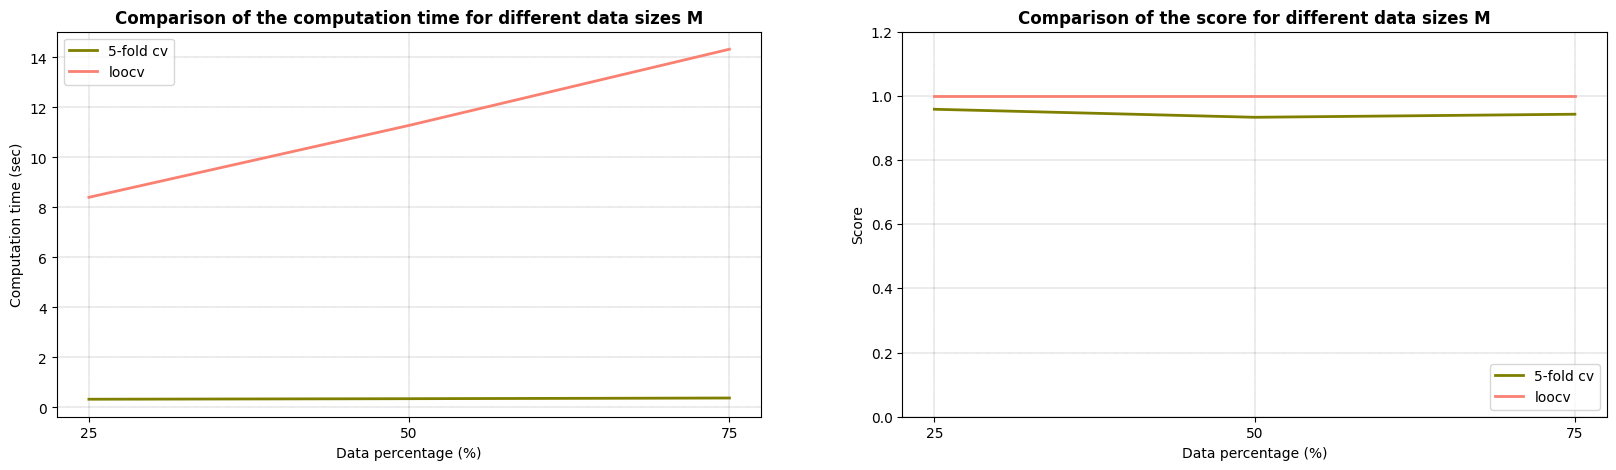

In [3]:
# Plotting and comparison
# 5-Fold cv
fold_5_cv_score = [0.9583333333333334, 0.9333333333333333, 0.9428571428571428]
fold_5_cv_time = [0.3284163475036621, 0.34955358505249023, 0.37700915336608887]

# loocv
loocv_score = [1, 1, 1]
loocv_time = [8.405148267745972, 11.282411336898804, 14.328845024108887]

data_percentage = [25, 50, 75]

#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

# Computation time comparison
fig1 = ax1.plot(data_percentage, fold_5_cv_time, linewidth=2, color='olive', label='5-fold cv')
fig2 = ax1.plot(data_percentage, loocv_time, linewidth=2, color='salmon', label='loocv')
ax1.set_title('Comparison of the computation time for different data sizes M',fontweight="bold")
ax1.set(xlabel='Data percentage (%)', ylabel='Computation time (sec)')
ax1.legend(['5-fold cv', 'loocv'])
ax1.set_xticks(np.arange(25, 100, 25))
ax1.grid(color='black', linestyle='--', linewidth=0.15)

# Score comparison
fig3 = ax2.plot(data_percentage, fold_5_cv_score, linewidth=2, color='olive', label='5-fold cv')
fig4 = ax2.plot(data_percentage, loocv_score, linewidth=2, color='salmon', label='loocv')
ax2.set_title('Comparison of the score for different data sizes M',fontweight="bold")
ax2.set(xlabel='Data percentage (%)', ylabel='Score')
ax2.legend(['5-fold cv', 'loocv'], loc='lower right')
ax2.set_xticks(np.arange(25, 100, 25))
ax2.set_yticks(np.arange(0, 1.25, 0.2))
ax2.grid(color='black', linestyle='--', linewidth=0.15)

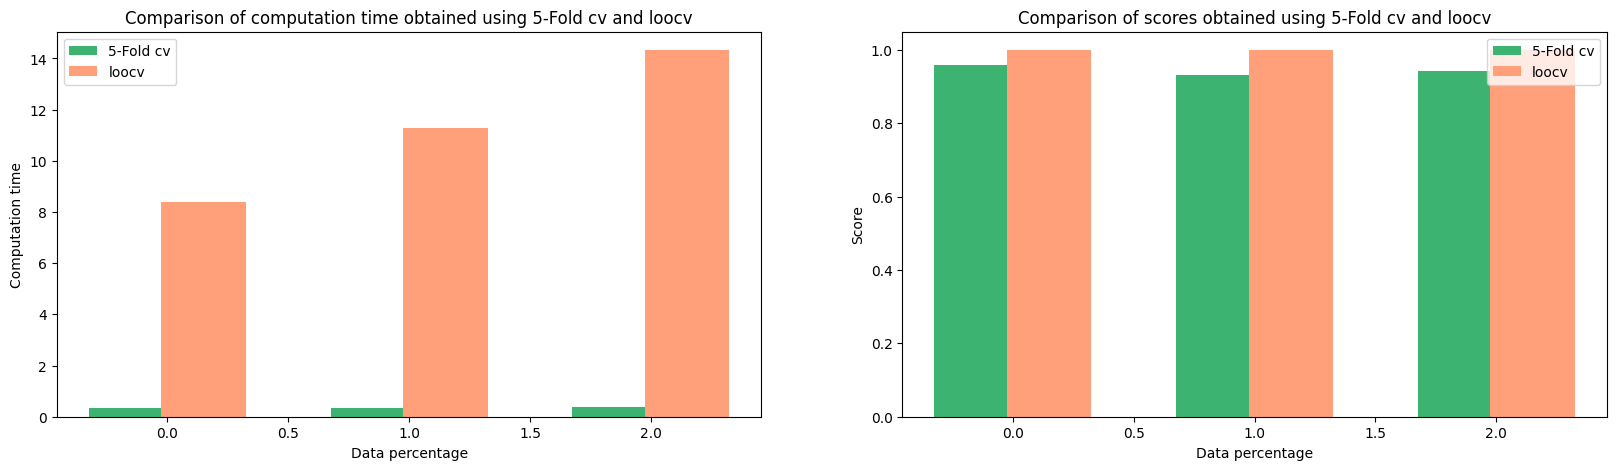

In [45]:
# Plotting using bars
# 5-Fold cv
fold_5_cv_score = [0.9583333333333334, 0.9333333333333333, 0.9428571428571428]
fold_5_cv_time = [0.3284163475036621, 0.34955358505249023, 0.37700915336608887]

# loocv
loocv_score = [1, 1, 1]
loocv_time = [8.405148267745972, 11.282411336898804, 14.328845024108887]

data_percentage = ['25', '50', '75']
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

# Computation time comparison  
X = np.arange(3)  
ax1.bar(X - 0.15, fold_5_cv_time, 0.35, label = '5-Fold cv', color ='mediumseagreen')
ax1.bar(X + 0.15, loocv_time, 0.35, label = 'loocv', color ='lightsalmon')
ax1.legend(labels=['5-Fold cv', 'loocv'])
ax1.set_xlabel('Data percentage')
ax1.set_ylabel('Computation time')
ax1.set_title('Comparison of computation time obtained using 5-Fold cv and loocv')

# Score comparison 
ax2.bar(X - 0.15, fold_5_cv_score, 0.35, label = '5-Fold cv', color ='mediumseagreen')
ax2.bar(X + 0.15, loocv_score, 0.35, label = 'loocv', color ='lightsalmon')
ax2.legend(labels=['5-Fold cv', 'loocv'])
ax2.set_xlabel('Data percentage')
ax2.set_ylabel('Score')
ax2.set_title('Comparison of scores obtained using 5-Fold cv and loocv')
plt.show()

Following the comparison between the 5-fold cv and loocv algorithms for the same data size of the class "R" and different data sizes of "M", we conduct the following conclusions:

* **Regarding the accuracy:** The loocv algorithm uses more training samples in every iteration compared to the 5-fold cv (the model can learn better). Thus, its accuracy is a little better than the 5-fold cv, as illustrated in the above right figure.

* **Regarding the computing time:** The 5-fold cv algorithm is faster when it comes to computational time, as illustrated in the above left figure. For instance, the 5-fold cv represents a speed-up equal to: $25.6$ in the case of a $25\%$ of the data "M", $32.28\%$ in the case of a $50\%$ of the data "M" and $38\%$ in the case of a $75\%$ of the data "M", which means that the loocv computational time increased as the size of the data increases.

In conclusion, it is recommended to use the loocv algorithm when having an optimized accuracy is more important than the computational time, or in case one has a small dataset.

## Exercise 3: Outlier Detection with Local Outlier Factor (LOF) for Time-Series Data <a id='ex3'></a>

The aim of this exercise is to determine the outliers in a time-series using the local outlier factor (LOF).

### a.1) Definition of an "outlier" in this case study

An outlier (or an anomaly) is considered as an observation which is different or diverged from the rest in the dataset (observations) [3.1](https://arshren.medium.com/anomaly-detection-using-local-outlier-factor-4e52f16894f).

In a time-series dataset, an outlier is a point behaving abnormally (out of norm, unexpectedly) at a certain datum compared to the global points of the time-series or the local points (its neighbors) [3.2](https://s-ai-f.github.io/Time-Series/outlier-detection-in-time-series.html). This could be represented by sudden "spikes" or sudden "falls" which are not consistent with the data trend [3.3](https://antonsruberts.github.io/anomaly-detection-web/).

### a.2) Corresponding modifications performed to the original density-based method

The local outlier factor is an unsupervised ML algorithm which distinguish the outliers from its local neighbors [3.4](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#:~:text=The%20Local%20Outlier%20Factor%20(LOF,lower%20density%20than%20their%20neighbors.), and is a density-based method.

These density-based methods for anomaly detection consider that the outliers are isolated, and thus are located in low density areas [3.5](https://antonsruberts.github.io/anomaly-detection-web-2/). The idea behind the local outlier detection is to compare the point density with a local average and consider it an outlier if is has a low density relatively to its neighbors.

For time-series, the data is sorted in function of time, and thus outliers are either spikes of drops which are sudden and deviated from the dataset. Here, the metric for calculating the distance is no longer set as the  “minkowski” by default (standard Euclidean distance if p = 2), but could be introduced as a function taking into account the features except the time component and determines which point is derivated from the curve.

### b) Demonstration of the LOF method using 1D signal and 2D signal

In [132]:
# Implort necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
# pip install adtk
from adtk.visualization import plot

#### Generate a 1D signal as a dataset

In this first example, the sorted dataset is a time-series including the variation of a feature x1 (a sinus function) in function of time. The outliers are then produced using a uniform random distribution, as shown here-under.

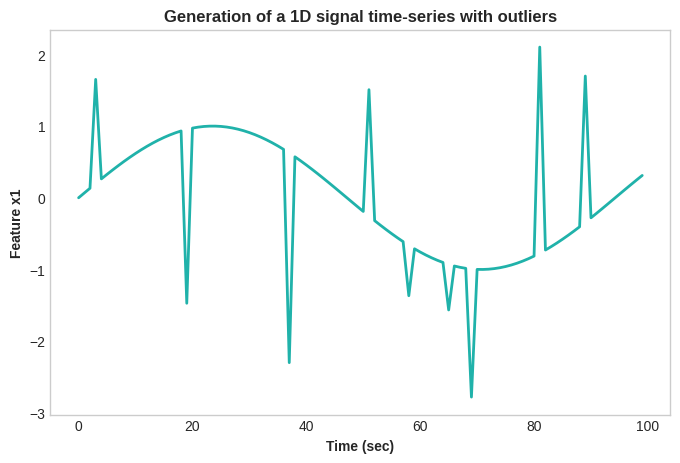

In [133]:
# Generate a 1D signal
# Define the time component
time = np.arange(100)

# Define the feature x1
x1 = np.sin(time/15)

# Add outliers
# Fix a random seed
np.random.seed(20)

rand_pos = np.random.uniform(0,100,size=10) # Outlier position
rand_val = np.random.uniform(-3,3,size=10) # Outlier value

for i in range(len(rand_pos)):
    x1[int(rand_pos[i])] = rand_val[i]

# Plot
fig = plt.figure(figsize=(8,5))
plt.plot(time,x1,color='lightseagreen',linewidth=2)
plt.title("Generation of a 1D signal time-series with outliers", fontweight="bold")
plt.xlabel('Time (sec)', fontweight="bold")
plt.ylabel('Feature x1', fontweight="bold")
plt.grid(False)

#### Local Outlier Factor model creation ( unsupervised anomaly detection algorithm)

To create the LOF model, two hyperparameters (among LOF parameters) will be used in this exercise [3.6](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor):

* **"n_neighbors":** The considered number of neighbors and helps to obtain the LOF score,
* **"contamination":** The proportion of isolated points to be considered (outliers), and is used as a threshold on the observations scores.

For the sake of anomaly visualization, the ADTK, a Python package, will be used for the case of 1D signal.

Predictions: 
[ 1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1]
Anomaly detection using LOF and adtk


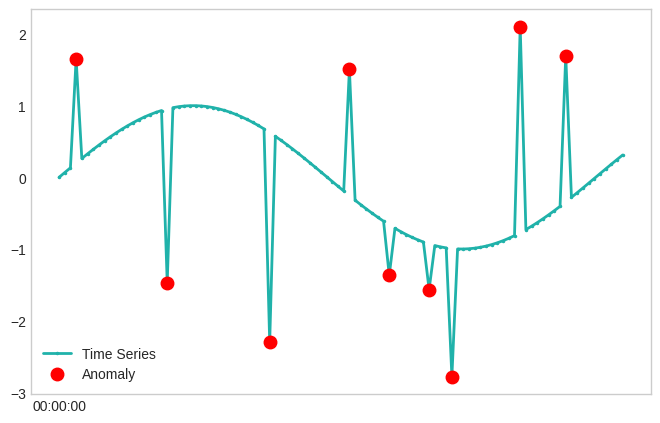

In [134]:
# Convert the time array to DatetimeIndex
Time = pd.to_datetime(time)

# Generate a pandas time-series
dataset = pd.Series(data=x1, index=Time)

# Fit the model using LOF
lof_1d = LocalOutlierFactor(contamination='auto')

# Make prediction
y_pred_1d = lof_1d.fit_predict(np.array(dataset).reshape(-1,1))
print("========================")
print("Predictions: " )
print("========================")
print(y_pred_1d)

y_pred_1d = pd.Series([idx == -1 for idx in y_pred_1d], index=dataset.index)

# Plot the dataset and the outliers
print("========================")
print("Anomaly detection using LOF and adtk" )
print("========================")
plot(dataset, anomaly=y_pred_1d, ts_linewidth=2, ts_markersize=3, ts_color= 'lightseagreen', anomaly_color='red', 
     figsize=(8,5),
     anomaly_tag="marker", anomaly_markersize=9)
plt.grid(False)

The predictions demonstrate that outliers are referred to with a value equal to $-1$. Spikes or drops in the curve showing anomalies are represented by red dots in the time-series thanks to plot of ADTK.

#### Generate a 2D signal as a dataset

In this second example, a 2D signal having two features (x1, x2) varying in function of time is randomly plotted with parametrized proportion of outliers. The LOF is then applied to this dataset to identify the anomalies.

Text(0.5, 0.92, 'Generation of a 2D signal in function of time (with outliers)')

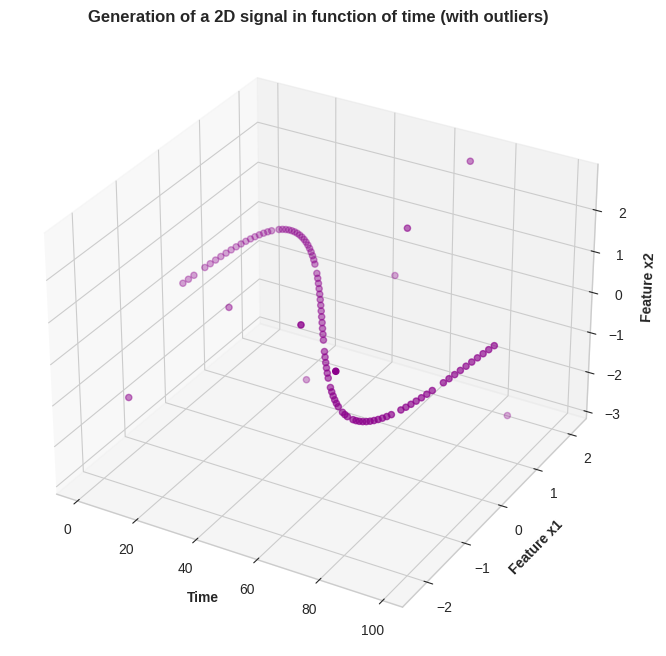

In [61]:
# Define the time vector
time = np.arange(100)

# Define the feature x1 vector
x1 = np.sin(time/15)

# Define the feature x2 vector
x2 = np.sin(time/15)

# Add outliers to the data
# Fix a random seed
np.random.seed(20)
rand_pos = np.random.uniform(0,100,size=10)
rand_val = np.random.uniform(-3,3,size=(10,2))

for i, pos in enumerate(rand_pos):
    x1[int(pos)] = rand_val[i,0]
    x2[int(pos)] = rand_val[i,1]

# Plot the data
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(time, x1, x2, color='darkmagenta')

ax.set_xlabel('Time',fontweight="bold")
ax.set_ylabel('Feature x1',fontweight="bold")
ax.set_zlabel('Feature x2',fontweight="bold")
ax.set_title('Generation of a 2D signal in function of time (with outliers)',fontweight="bold")

#### Local Outlier Factor model creation ( unsupervised anomaly detection algorithm)

In this case of example, LOF is applied considering:

* A number of neighbors equal to 3,
* A contamination proportion of outliers equal to 0.1.

The prediction represent the outliers with a value equal to $-1$. It should be noted that the distance metric used in this example is defined taking into account all features except the time, and is represented by the function "mydist".

In [62]:
data = np.c_[x1, x2, time]

# Define a distance function taking into account all features except the time
def mydist(u,v):
    # We assume that the time feature is the last feature
    return np.linalg.norm(u[:-1]-v[:-1])

# Fit the model using local outlier factor for anomaly detection
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1, metric=mydist)

# Predict labels of training data and identify outliers (represented by -1)
y_pred = lof.fit_predict(data)

# Compute the scores of the outliers (needed to draw the radius of the outliers)
X_scores = lof.negative_outlier_factor_

print(y_pred)

[ 1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1]


In the section hereunder, the outliers are highlighted within circles based on their scores. From the figure below, one can see that for the generated dataset, the LOF algorithm succeeded in identifying the outliers with 1 prediction error.

Text(0.5, 0.92, 'Outlier detection with LOF for time-series 2D signal')

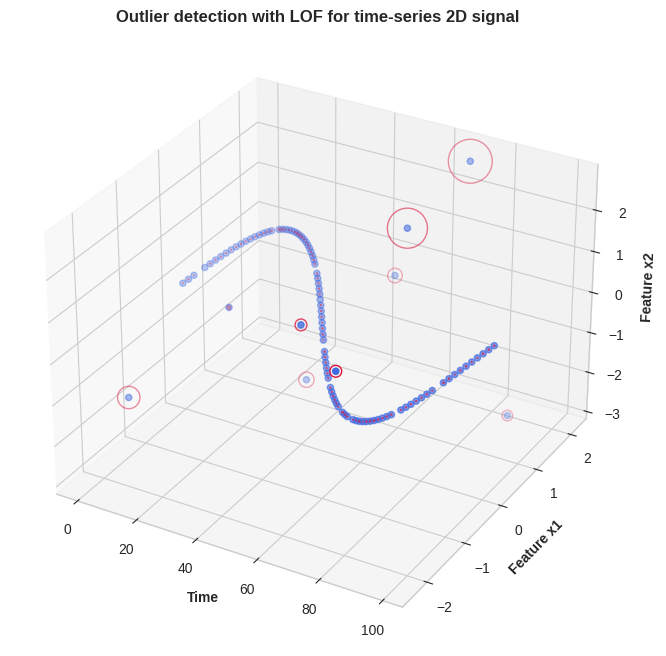

In [63]:
# Compute the radius of the circles
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# Plot
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Plot the (time,x1,x2) 3D plot
ax.scatter3D(time, x1, x2, color='royalblue') 

# Plot circles
ax.scatter3D(time, x1, x2, s=1000 * radius, edgecolors='crimson',
            facecolors='none', label='Outlier scores')

ax.set_xlabel('Time',fontweight="bold")
ax.set_ylabel('Feature x1',fontweight="bold")
ax.set_zlabel('Feature x2',fontweight="bold")
ax.set_title('Outlier detection with LOF for time-series 2D signal',fontweight="bold")

In [64]:
true_outliers = sorted([int(pos) for pos in rand_pos])
predicted_outliers = sorted([i for i,score in enumerate(y_pred) if score==-1])

# Compute the errors 
n_errors = np.sum([1 for outlier in predicted_outliers if outlier not in true_outliers])

print("True outliers: ", true_outliers)
print("Predicted outliers: ", predicted_outliers)
print("Number of errors: ", n_errors)

True outliers:  [3, 19, 37, 51, 58, 65, 69, 81, 89, 89]
Predicted outliers:  [3, 19, 21, 37, 51, 58, 65, 69, 81, 89]
Number of errors:  1


Comparing the positions of the actual outliers and the predicted outliers, one prediction error is made using the LOF algorithm. This concludes on the accuracy of this later when it comes to identifying the outliers.

### Effect of increasing the data size and number of outliers in LOF

In this example, the number of data size is increased to 1000 points, whereas the number of outliers is increased to 30. The same procedure as above will be applied. The contamination is changed to 0.3 which is the proportion of the outliers in the dataset.

Text(0.5, 0.92, 'Generation of a 2D signal in function of time (with outliers)')

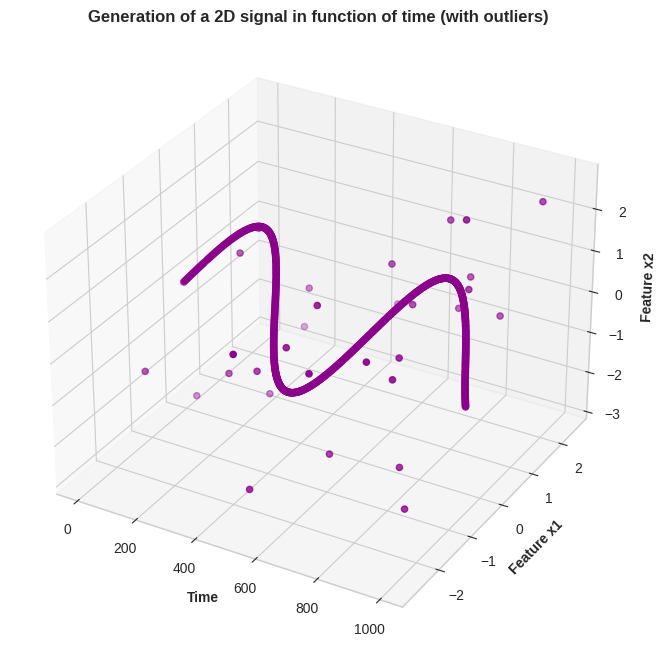

In [70]:
# Define the time vector
time = np.arange(1000)

# Define the feature x1 vector
x1 = np.sin(time/100)

# Define the feature x2 vector
x2 = np.sin(time/100)

# Add outliers to the data
# Fix a random seed
np.random.seed(20)
rand_pos = np.random.uniform(0,1000,size=30)
rand_val = np.random.uniform(-3,3,size=(30,2))

for i, pos in enumerate(rand_pos):
    x1[int(pos)] = rand_val[i,0]
    x2[int(pos)] = rand_val[i,1]

# Plot the data
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(time, x1, x2, color='darkmagenta')

ax.set_xlabel('Time',fontweight="bold")
ax.set_ylabel('Feature x1',fontweight="bold")
ax.set_zlabel('Feature x2',fontweight="bold")
ax.set_title('Generation of a 2D signal in function of time (with outliers)',fontweight="bold")

In [109]:
data = np.c_[x1, x2, time]

# Define a distance function taking into account all features except the time
def mydist(u,v):
    # We assume that the time feature is the last feature
    return np.linalg.norm(u[:-1]-v[:-1])

# Fit the model using local outlier factor for anomaly detection
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.03, metric=mydist)

# Predict labels of training data and identify outliers (represented by -1)
y_pred = lof.fit_predict(data)

# Compute the scores of the outliers (needed to draw the radius of the outliers)
X_scores = lof.negative_outlier_factor_

print("========================")
print("Predictions: " )
print("========================")
print(y_pred)

Predictions: 
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 

Text(0.5, 0.92, 'Outlier detection with LOF for time-series 2D signal')

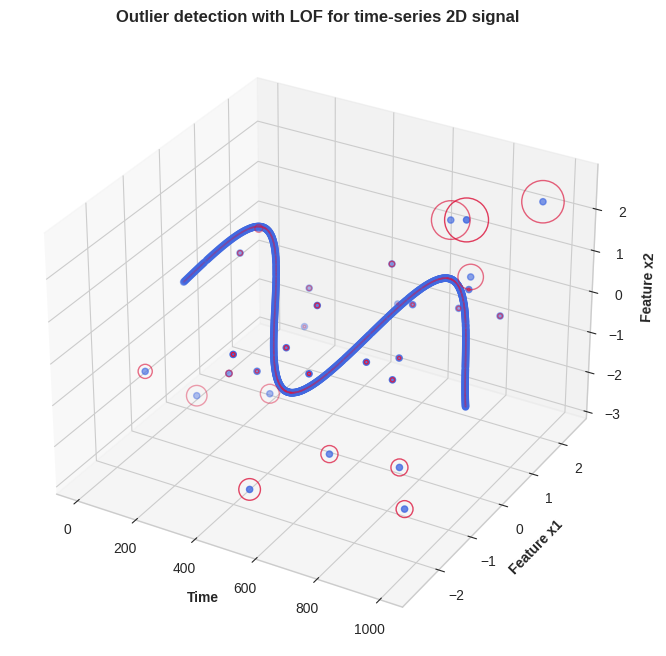

In [107]:
# Compute the radius of the circles
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# Plot
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Plot the (time,x1,x2) 3D plot
ax.scatter3D(time, x1, x2, color='royalblue') 

# Plot circles
ax.scatter3D(time, x1, x2, s=1000 * radius, edgecolors='crimson',
            facecolors='none', label='Outlier scores')

ax.set_xlabel('Time',fontweight="bold")
ax.set_ylabel('Feature x1',fontweight="bold")
ax.set_zlabel('Feature x2',fontweight="bold")
ax.set_title('Outlier detection with LOF for time-series 2D signal',fontweight="bold")

In [108]:
true_outliers = sorted([int(pos) for pos in rand_pos])
predicted_outliers = sorted([i for i,score in enumerate(y_pred) if score==-1])

# Compute the errors 
n_errors = np.sum([1 for outlier in predicted_outliers if outlier not in true_outliers])

print("True outliers: ", true_outliers)
print("Predicted outliers: ", predicted_outliers)
print("Number of errors: ", n_errors)

True outliers:  [35, 36, 116, 178, 193, 239, 254, 272, 378, 461, 492, 497, 518, 561, 588, 631, 657, 691, 718, 751, 770, 775, 783, 815, 839, 850, 857, 891, 897, 949]
Predicted outliers:  [35, 36, 116, 178, 193, 239, 254, 272, 378, 461, 492, 497, 518, 561, 588, 631, 657, 691, 718, 751, 770, 775, 783, 815, 839, 850, 857, 891, 897, 949]
Number of errors:  0.0


By increasing the data samples, as well as the number of the outliers in the dataset and choosing the adequate contamination value for the LOF algorithm, we obtained a null prediction error, demonstrating the accuracy of the LOF for anomaly detection in time-series.

### Conclusions:

Considering the results obtained from the above examples, one can conclude the following:

* The LOF is a density-based algorithm (a proximity-based method), which is accurate for the outliers identification even in the case of time-series,
* The LOF requires a prior knowledge of the dataset. For instance, in case of increasing the number of data samples, one must be able to identify the proportion of the outliers in it. Otherwise, contamination should be set equal to "auto".

## Exercise 4: <a id='ex4'></a>



The Gaussian Mixture Model (GMM) is an unsupervised clustering algorithm which aims at estimating the parameters of a Gaussian mixture distribution composed of $K$ components (or clusters). This work was subdivided into three sections. 
* The first section provides a description of the **basics of GMM** as well as its **extension to top-down clustering approaches**. 
* The implementation will be detailed in the second section. 
* Finally, the third section presents the experiments results.

### Theoretical background
#### Gaussian Mixture Model

The formulas and notations used here after are taken from the Wikipedia page about the topic [4.1](https://fr.wikipedia.org/wiki/Loi\_normale\_multidimensionnelle) [4.2](https://fr.wikipedia.org/wiki/Algorithme\_esp\%C3\%A9rance-maximisation). The model is composed by $K$ Gaussian
density functions. Each Gaussian $k\in\left[1,...,K\right]$ is characterized by three parameters:

* A mean vector $\mu_{k}$ that defines its center.
* A covariance matrix $\Sigma_{k}$ that defines its width.
* A mixing probability $\pi_{k}$ that defines how big or small the Gaussian will be. The sum of the probabilities is equal to one:

$ \boxed{\sum_{k=1}^{K}\pi_{k}=1} \, \, \, \mathbf{(Eq. (4.1))}$

For a data sample $x\in\mathbb{R}^{D}$, with $D$ the dimension size
(also called the number of features), the multivariate normal distribution density function of the $k$'th component is given by:

$\boxed{f_{\mu_{k},\Sigma_{k}}(x)=\frac{1}{\left(2\pi\right)^{D/2}det\left(\Sigma_{k}\right)^{1/2}}exp[-\frac{1}{2}\left(x-\mu_{k}\right)^{T}\Sigma^{-1}\left(x-\mu_{k}\right)]}\, \, \, \mathbf{(Eq. (4.2))}$

The mean vector $\mu_{k}$ and the covariance matrix $\Sigma_{k}$
are given by:

$\boxed{\mu_{k} =\frac{1}{n}\sum_{i=1}^{n}x_{i}}\, \, \, \mathbf{(Eq. (4.3))}$

$\boxed{\Sigma_{k} =\frac{1}{n}\sum_{i=1}^{n}\left(x_{i}-\mu_{k}\right)\left(x_{i}-\mu_{k}\right)^{T}}\, \, \, \mathbf{(Eq. (4.4))}$

with $n$ the number of samples in the dataset.

The **Expectation-Maximization algorithm** is used to fit the
parameters of the Gaussian mixtures. It is an iterative method and
the following is a brief description of its different steps. Let's
denote $t_{ik}$ the probability that the sample $x_{i}$ belongs
to component $k$. At the expectation step, and using the current
model parameters, $t_{ik}$ is approximated by:

$\boxed{t_{ik}=\frac{\pi_{k}f_{\mu_{k},\Sigma_{k}}\left(x_{i}\right)}{\sum_{l=1}^{K}\pi_{k}f_{\mu_{k},\Sigma_{k}}\left(x_{i}\right)}}\, \, \, \mathbf{(Eq. (4.5))}$

The parameters are then updated in the maximization step as the following:

$\boxed{\pi_{k} =\frac{1}{n}\sum_{i=1}^{n}t_{ik}}\, \, \, \mathbf{(Eq. (4.6))}$
$\boxed{\mu_{k} =\frac{\sum_{i=1}^{n}t_{ik}x_{i}}{\sum_{i=1}^{n}t_{ik}}}\, \, \, \mathbf{(Eq. (4.7))}$
$\boxed{\Sigma_{k} =\frac{\sum_{i=1}^{n}t_{ik}\left(x_{i}-\mu_{k}\right)\left(x_{i}-\mu_{k}\right)^{T}}{\sum_{i=1}^{n}t_{ik}}}\, \, \, \mathbf{(Eq. (4.8))}$

The maximization step maximize the log-likelihood given by:
$\boxed{Q=\sum_{k=1}^{K}\sum_{i=1}^{n}t_{ik}log\left(\pi_{k}f_{\mu_{k},\Sigma_{k}}\left(x_{i}\right)\right)}\, \, \, \mathbf{(Eq. (4.9))}$

#### Global greedy method

In the greedy method, the number of components of the model are incremented one by one. The initialization of the center of each new component is tested with all the samples, and the test which produces the minimum error will be kept. At each step, the basic GMM can used with right inputs. Further details will be provided in the  implementation section.

#### Bisecting method

The main idea of the bisecting method is to increment the number of
clusters by running each time a 2-component clustering algorithm on
one of the clusters of the previous step. After adding a new component, a fitting of all the components can also be performed. The application of this method with the GMM is not obvious.

**Main problem of applying the bisecting principle in the GMM
case:**

In the k-means algorithm, the mean of the cluster is computed from
the points which belongs to that cluster. In the GMM however, the
parameters of the density functions depends on all the points of the
dataset. Thus, we can't simply isolate some points and run the GMM
with only two components. The suggested algorithm is the following:

Given a trained GMM with $K$ components. The component with the least
log-likelihood, denoted with subscript $a$, is selected to be modified, and also a new component, denoted with subscript $b$, is added in order to have at the end $K+1$ component. The work around consists in fitting only the components $a$ and $b$, depending on all the points of the dataset as always, and without the modification of the remain components, which were already fitted. In all cases, the sum of the probabilities $t_{ik}$ over all the components should be equal to one. As only the parameters of two components will be fitted, the sum $t_{ia}+t_{ib}$ should be constant over all the samples. To do
so, both $t_{ia}$ and $t_{ib}$ will be normalized as the following:

$\boxed{t_{ia} =\pi_{a}f_{\mu_{a},\Sigma_{a}}\left(x_{i}\right)C}\, \, \, \mathbf{(Eq. (4.10))}$

$\boxed{t_{ib} =\pi_{b}f_{\mu_{b},\Sigma_{b}}\left(x_{i}\right)C}\, \, \, \mathbf{(Eq. (4.11))}$

with : 
$ C=\frac{\left(1-{\displaystyle \sum_{\begin{array}{c}
k=1\\
k\neq a,b
\end{array}}^{K+1}t_{ik}}\right)}{t_{ia}+t_{ib}}\, \, \, \mathbf{(Eq. (4.12))}$

### Implementation

Inspired by the data structure and the notation of scikit-learn [3](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture), a class named MyGassianMixture was implemented. This class allows the basic fitting method as well as the global greedy fitting and the bisecting fitting methods. Here's the class implementation followed by the description of the main methods.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
class MyGaussianMixture:
    """
    Implementation of the Gaussian Mixture Model based on the Expectaion-Maximisation (EM) algorithm.
    Various fitting methods are provided:
        - Base "fit" method with random initialization or with a pre-clustered data
        - "greedy_global_fit" as described in the assignement
        - "bisecting_fit" as described in the assignement
    In contrary to the sklearn implementaion, this class do not support multiple initializations.
    Each Guassian function is characterized by a full covariance matrix.
    """
    
    def __init__(self, n_components=1, tol=1e-3, max_iter=100, random_state=None):
        """
        Constructor method.

        Parameters
        ----------
        n_components : int, optional
            The number gaussian functions to be fitted. The default is 1.
        tol : float, optional
            The convergence threshold. The default is 1e-3.
            EM iterations will stop when the lower bound average gain is below this threshold.
        max_iter : int, optional
            The number of EM iterations to perform each time the "fit" method is called. The default is 100.
        random_state : int, optional
            The default is None.

        Returns
        -------
        None.

        """

        self.max_iter = max_iter
        self.tol = tol
        self.n_components = n_components # The number of mixture components.
        self.random_state = np.random.RandomState(random_state)
        
    # =============================================================================
    #     initialisation methods
    # =============================================================================
    
    def fit_init(self, X, initial_labels=None):
        """
        This method initialize the model parameters randomly or with the given initial labels.
        
        Description of the inputs provided in the "fit" method.
        """
        
        # Get the shape of the data
        n_samples, n_features = X.shape
        if initial_labels is None:
            # random initialisation of t matrix
            self.t_ = self.random_state.uniform(size=(n_samples, self.n_components))
            # normalisation
            for sample in range(n_samples):
                sum_ = np.sum([self.t_[sample, component] for component in range(self.n_components)])
                for component in range(self.n_components):
                    self.t_[sample, component] /= sum_
        else:
            # check that initial_labes have the same lenth as the data points
            assert len(initial_labels) == n_samples, "initial_labels should have the same length as the data points"
            # count the number of labels
            key_labels = {}
            for label in initial_labels:
                if label not in key_labels.keys():
                    key_labels[label] = len(key_labels) # we assign to each label an integer
            # The number of labels keys should be equal to the number components of the model
            if self.n_components != len(key_labels):
                self.n_components = len(key_labels)
            # setting t matrix with the right labels
            self.t_ = np.zeros((n_samples, self.n_components))
            for idx, label in enumerate(initial_labels):
                self.t_[idx,key_labels[label]] = 1
        
        # set (or reset) of the models parameters
        self.components_to_fit = range(self.n_components)
        self.means_ = np.zeros((self.n_components, n_features))
        self.weights_ = np.zeros(self.n_components)
        self.covariances_ = np.zeros((self.n_components, n_features, n_features))
        self.covariances_inv_ = np.zeros((self.n_components, n_features, n_features))
        self.gaussian_pre_exp_ = np.zeros(self.n_components)
        self.components_likelihood = np.zeros(self.n_components)
        # m_step method is used here to estimate the initial model parameters 
        self.m_step(X)
        
    def adapt_model_parameters_(self, X, fit_mask):
        """
        This method will adapt the model parameters depending on the provided fit_mask.
        It is assumed that there is at least one of the old components that will be fitted again.
        
        Description of the inputs provided in the "fit" method.
        """
        
        # Get the shape of the data
        n_samples, n_features = X.shape
        # Check that the added components will be fitted
        for i in range(self.n_components,len(fit_mask)):
            assert fit_mask[i], "The added components can not be masked"
        # Numebr of components t obe added
        n_new_components = len(fit_mask)-self.n_components
        # extend the existing arrays
        self.means_ = np.pad(self.means_,((0,n_new_components),(0,0)))
        self.weights_ = np.pad(self.weights_,(0,n_new_components))
        self.covariances_ = np.pad(self.covariances_,((0,n_new_components),(0,0),(0,0)))
        self.covariances_inv_ = np.pad(self.covariances_inv_,((0,n_new_components),(0,0),(0,0)))
        self.t_ = np.pad(self.t_,((0,0),(0,n_new_components)))
        self.gaussian_pre_exp_ = np.pad(self.gaussian_pre_exp_,(0,n_new_components))
        self.components_likelihood = np.pad(self.components_likelihood,(0,n_new_components))
        # fill the parameters of the new components from the parameters of the components to be fitted again
        for sample in range(n_samples):
            # const is the probability to distribute on the components to be fitted
            const = 1-np.sum([self.t_[sample,component] for component in range(self.n_components) if component not in self.components_to_fit])
            sum_ = 0
            rand = self.random_state.uniform(size=len(self.components_to_fit))
            for i, component in enumerate(self.components_to_fit):
                self.t_[sample,component] = rand[i]
                sum_ += self.t_[sample,component]
            for component in self.components_to_fit:
                self.t_[sample,component] *= const/sum_
        # m_step method is used here to estimate the initial model parameters 
        self.m_step(X)
        # update the number of components
        self.n_components = len(fit_mask)
    
    # =============================================================================
    #     base fitting methods
    # =============================================================================
    
    def fit(self, X, initial_labels=None, fit_mask=None):
        """
        Base fitting method of GMM based on the EM algorithm.
        It is also used by "greedy_global_fit" and "bisecting_fit".
        
        The following attributes will be defined in this methos:
            - means_            : The mean of each mixture component
            - weights_          : The weigts of the mixture components
            - covariances_      : Variance-Covariance matrix
            - n_iter_           : Number of step used by the best fit of EM to reach the convergence
            - converged_        : True when convergence was reached in fit(), False otherwise
            - self.likelihood   : Log-likelihood
            - self.components_likelihood : Log-likelihood of each component

        Parameters
        ----------
        X : matrix of floats, shape = n_samples, n_features
            Input data points used for the fitteng of the gaussian functions
        initial_labels : array int, size = n_samples, optional
            Initial labels of the data points, used to initialize the functions parameters. The default is None.
            If the number of labels is bigger than the number of components, additional components will be added.
            Random initialization if not specified.
        fit_mask : array of bool, size = n_components, optional
            Array of flags to fit only some of the components. The default is None.
            If the number of flags is bigger than the number of components, additional components will be added.
            All the components will be fitted if not specified. 

        Returns
        -------
        Object.
            The fitted GMM.

        """
        
        # Get the shpe of the data
        n_samples, n_features = X.shape
        
        ## Initialization
        if fit_mask is None:
            # initialize model parameters randomly or with the given initial labels
            self.fit_init(X, initial_labels=initial_labels)
        else:
            # check the coherence of fit_mask
            assert len(fit_mask) >= self.n_components, "The length of the fit mask should be at least equal to the number of the components"
            # get the components to be fitted
            self.components_to_fit = [component for component in range(len(fit_mask)) if fit_mask[component]]
            # If the length of fit_mask is bigger than the number of components,
            # then new components need to be added and the model parameters need to be adapted
            if len(fit_mask) > self.n_components:
                self.adapt_model_parameters_(X, fit_mask)
        
        ## start the EM algorithm
        self.n_iter_ = 0
        self.converged_ = False
        # pre-compute the inverse of the covariances matrices and the pre-exponential factor of the density function
        # notice that we loop only on the components to be fitted
        for component in self.components_to_fit:
            self.covariances_inv_[component] = np.linalg.inv(self.covariances_[component])
            # self.gaussian_pre_exp_[component] = 1.0/(np.power(2*np.pi,0.5*n_features)*np.power(np.max([np.linalg.det(self.covariances_[component]),1e-6]),0.5))
            self.gaussian_pre_exp_[component] = 1.0/(np.power(2*np.pi,0.5*n_features)*np.power(np.linalg.det(self.covariances_[component]),0.5))
                
            self.components_likelihood[component] = 0
            for sample in range(n_samples):
                self.components_likelihood[component] += self.t_[sample,component]*np.log(self.weights_[component]*self.gaussian_function_(X[sample],component))                
        self.likelihood = np.sum(self.components_likelihood)

        # iterate until convergence
        while not self.converged_ and self.n_iter_ < self.max_iter:
            # Expectation step
            self.e_step(X)
            # Maximisation step
            self.m_step(X)
            # Evaluation
            old_likelihood = self.likelihood
            for component in self.components_to_fit:
                self.components_likelihood[component] = 0
                self.covariances_inv_[component] = np.linalg.inv(self.covariances_[component])
                self.gaussian_pre_exp_[component] = 1.0/(np.power(2*np.pi,0.5*n_features)*np.power(np.linalg.det(self.covariances_[component]),0.5))
                for sample in range(n_samples):
                    self.components_likelihood[component] += self.t_[sample,component]*np.log(self.weights_[component]*self.gaussian_function_(X[sample],component))                
            self.likelihood = np.sum(self.components_likelihood)
            self.converged_ = np.abs(self.likelihood-old_likelihood) < self.tol
            self.n_iter_ += 1
            
        return self
    
    # =============================================================================
    #     Top-down fitting methods
    # =============================================================================
    
    def greedy_global_fit(self, X, sub_iter = 1):
        """
        Implementation of the greedy global fitting method.

        Parameters
        ----------
        X : matrix of floats, shape = n_samples, n_features
            Input data points used for the fitteng of the gaussian functions
        sub_iter : int, optional
            Maxium number of iterations used for the testing the sample. The default is 1.
            The attribute 

        Returns
        -------
        Object.
            The fitted GMM.

        """
        
        self.tot_n_iter = 0 # Total number of EM steps performed by all the fittings
        # store the desired number of components and increment the attribure n_components
        tot_n_component = self.n_components
        max_iter = self.max_iter
        self.n_components = 1
        # Get the data shape
        n_samples, n_features = X.shape
        previous_labels = np.zeros(n_samples) # initially all the points have the same label
        # get the kNN of each point. k is set here as n_feature+1
        # we will use the function kNN_filter defined in assignment 1.
        kNN_matrix = kNN_filter(X,n_features+1)
        # start the greedy global algorithm
        for n_component in range(1,tot_n_component):
            self.max_iter = sub_iter
            best_sample = 0
            best_likelihood = -np.inf
            for sample in range(n_samples):
                stop = False
                # label the sample and its neighbors with the new component
                labels = np.copy(previous_labels)
                for idx, neighbor in enumerate(kNN_matrix[sample]):
                    if neighbor:
                        labels[idx] = n_component
                        
                # check that there is at least 2 samples in each component
                for label in range(n_component+1):
                    if list(labels).count(label) < 2:
                        stop = True
                if stop:
                    continue
                
                # fit with the provided labels
                self.fit(X, labels)
                self.tot_n_iter += self.n_iter_
                # evaluate
                if self.likelihood > best_likelihood:
                    best_likelihood = self.likelihood
                    best_sample = sample
                # print(sample,"/",n_samples," ",n_component,"/",tot_n_component)
            # final fit with the retained solution
            labels = np.copy(previous_labels)
            for idx, neighbor in enumerate(kNN_matrix[best_sample]):
                if neighbor:
                    labels[idx] = n_component
            self.max_iter = max_iter
            self.fit(X, labels)
            self.tot_n_iter += self.n_iter_
            # update the labels with the trained model before adding a new component
            previous_labels = self.predict(X)
            
        return self
    
    
    def bisecting_fit(self, X, global_update = False):
        """
        Implementation of the biscecting fitting method.

        Parameters
        ----------
        X : matrix of floats, shape = n_samples, n_features
            Input data points used for the fitteng of the gaussian functions

        Returns
        -------
        Object.
            The fitted GMM.

        """
        
        self.tot_n_iter = 0 # Total number of EM steps performed by all the fittings
        # store the desired number of components and increment the attribure n_components
        tot_n_component = self.n_components
        # 2 components are initially fitted
        assert self.n_components > 2, "The number of components should be greater than 2 to perform the bisecting_fit"
        self.n_components = 2
        self.fit(X)
        self.tot_n_iter += self.n_iter_
        for n_component in range(3,tot_n_component+1):
            # print(n_component)
            fit_mask = np.zeros(n_component)
            # the component with the minimal log-likelihood will be fitted again
            fit_mask[np.argmin(self.components_likelihood)] = 1 
            # the added component will be also fitted
            fit_mask[n_component-1] = 1
            self.fit(X, fit_mask=fit_mask)
            self.tot_n_iter += self.n_iter_
        # Last call, all the components will be fitted again
        # fit_mask = np.ones(tot_n_component)
        # self.fit(X,fit_mask=fit_mask)
        # self.tot_n_iter += self.n_iter_
        
        return self
    
    # =============================================================================
    #     Prediction methods
    # =============================================================================

    def predict(self, X):
        """
        Predict the labels of the data points based on the trained GMM

        Parameters
        ----------
        X : X : matrix of floats, shape = n_samples, n_features
            Data to be labeled.

        Returns
        -------
        labels : array of int, size = n_samples
            Predicted labels.

        """
        
        # initialize the labels array
        labels = np.zeros(len(X))
        # for each sample, evaluate the guassian density function using all the componets and select the higher one
        for sample,x in enumerate(X):
            best = self.weights_[0]*self.gaussian_function_(x, 0)
            labels[sample] = 0
            for component in range(1, self.n_components):
                maybe_best = self.weights_[component]*self.gaussian_function_(x, component)
                if maybe_best > best:
                    best = maybe_best
                    labels[sample] = component
                    
        return labels

    # =============================================================================
    #     Expectation-Maximisation algorithm 
    # =============================================================================
    
    def e_step(self, X):
        """
        Expectation step of the EM algorithm.
        Formulas taken from: https://fr.wikipedia.org/wiki/Algorithme_esp%C3%A9rance-maximisation

        Description of the inputs provided in the "fit" method.
        """
        n_samples = len(X)
        for sample in range(n_samples):
            # the expression here-under still valid in the default case (all the components should be fitted) as const will be simple equal to 1
            const = 1-np.sum([self.t_[sample,component] for component in range(self.n_components) if component not in self.components_to_fit])
            sum_ = 0
            for component in self.components_to_fit:
                self.t_[sample,component] = self.weights_[component]*self.gaussian_function_(X[sample], component)
                sum_ += self.t_[sample,component]
            for component in self.components_to_fit:
                self.t_[sample,component] *= const/sum_
                    
    def m_step(self, X):
        """
        Maximisation step of the EM algorithm.
        Formulas taken from: https://fr.wikipedia.org/wiki/Algorithme_esp%C3%A9rance-maximisation

        Description of the inputs provided in the "fit" method.
        """
        n_samples, n_features = X.shape
        for component in self.components_to_fit:
            self.weights_[component] = 0
            self.means_[component] = 0
            self.covariances_[component] = 0
            for sample in range(n_samples):
                self.means_[component] += self.t_[sample,component]*X[sample]
                self.weights_[component] += self.t_[sample,component]
                for feature1 in range(n_features):
                    for feature2 in range(feature1+1):
                        self.covariances_[component,feature1,feature2] += self.t_[sample,component]*X[sample,feature1]*X[sample,feature2]
                
            self.means_[component] /= self.weights_[component]
            self.covariances_[component] /= self.weights_[component]
            self.weights_[component] /= n_samples
            for feature1 in range(n_features):
                for feature2 in range(feature1+1):
                    self.covariances_[component,feature1,feature2] -= self.means_[component,feature1]*self.means_[component,feature2]
                    if feature2 != feature1:
                        self.covariances_[component,feature2,feature1] = self.covariances_[component,feature1,feature2]
                    else:
                        self.covariances_[component,feature2,feature1] = np.max([self.covariances_[component,feature2,feature1],5e-2])

    # =============================================================================
    #     Multivariate gaussian density function 
    # =============================================================================
       
    def gaussian_function_(self, x, component):
        """
        Multivariate Gaussian density function evaluation
        Formula taken from: https://fr.wikipedia.org/wiki/Loi_normale_multidimensionnelle

        Parameters
        ----------
        x : array of float, size = n_features
            Data point at which the Guassian function will be evaluated.
        component : int
            Index of the component to be used for the evaluation.

        Returns
        -------
        float
            Result.
            
        """
        x_m_mu = x-self.means_[component]
        result = self.gaussian_pre_exp_[component] * np.exp(-0.5*np.matmul(x_m_mu,np.matmul(self.covariances_inv_[component],np.array([x_m_mu]).T))) + 1e-16
        return result

**fit method:**
This method provides the basic GMM as described in the first section. The initialization can be performed in two different was.

* A random initialization where the probabilities are filled with random values then normalized. An optional *random_state* value can be given to the class constructor for reproducibility of the results.
* Using an initial label list, $t_{ik}$ are set 0 or 1 depending if the sample belong to the component or not.

Once the $t_{ik}$ are set, the model parameters $\pi$, $\mu$ and $\Sigma$ are computed using equations (4.6), (4.7) and (4.8). This fitting method can also accept a mask in order to fit only some of the components. 
This feature will be useful with the *bisecting_fit* method. The initialization is managed thanks to the methods *fit_init* and *adapt_model_parameters*. The EM algorithm is implemented separately in the methods *e_step* and *m_step*. The model performance is evaluated using the log-likelihood computed for each component.

**greedy_global_fit method:**
The greedy global fitting loops of over the number of the components and for each component there is a loop over the samples to select the one with the maximum log-likelihood. The previous fit method is called in each test with an initial label list to force the initialization of the component parameters. In order to add a new component centered on a sample $x_{i}$, one may simply label it by the added component. Although such initialization may perfectly work with k-means algorithm, it is not adapted to the GMM. Indeed, the variance matrix will be equal to the null matrix. Thus, instead of labeling only one sample with the added components, some of its neighbors will be also labeled with the added component. The neighbors are determined using a kNN functions already used in the first assignment. 

In [4]:
def compute_dist(pt1,pt2):
    """
    Compute the square euclidean distance between pt1 and pt2.
    Implemented for a generic dimension

    Parameters
    ----------
    pt1 : Array like
        The coordinate of the fisrt point
    pt2 : Array like
        The coordiantes of the second point

    Returns
    -------
    dist: float
        Squatred  Euclidian distance between pt1 and pt2

    """    
    return sum([(pt1[i]-pt2[i])**2 for i in range(len(pt1))])
    
def compute_dist_matrix(points):
    """
    Return the distance (squared euclidean distance) between each point with and all other point

    Parameters
    ----------
    points : Array_like of size n
        points cloud

    Returns
    -------
    dist_matrix : array like of shape (n,n)
        each element in position (i,j) represents the squared distance between point i and point j

    """    
    N = len(points)
    dist_matrix = np.zeros((N,N))
    for i in range(N):
        for j in range(i):
            dist = compute_dist(points[i], points[j])
            dist_matrix[i,j], dist_matrix[j,i] = dist, dist
    return dist_matrix

def kNN_filter(points,k):
    """
    k-Nearest-Neighbor matrix applied on the data points.

    Parameters
    ----------
    points : Array_like of size n
        points cloud
    k : int
        number nearest neighbors to search around each point

    Returns
    -------
    kNN_matrix : array_like of shape (n,n)
        

    """
    N = len(points)
    kNN_matrix = np.zeros((N,N)) # Temporary matrix to store the kNN of each point
    
    dist_matrix = compute_dist_matrix(points) # Compute the distance matrix

    # Search for k-nearest neighbor by sorting the distance with all other points
    for i in range(N):
        sorted_neighbors = sorted(range(N), key = lambda l : dist_matrix[i,l])
        for j in range(k+1): # we add 1 to acount for the point it self (distance 0)
            kNN_matrix[i,sorted_neighbors[j]] = 1

    return kNN_matrix


Once the the test over all the samples are performed, the configuration giving the maximum likelihood is run again and a new label list is generated using the predict method.

**bisecting_fit method:** Initially a basic GMM is run with only 2 components in order to have an initial model. The other components are added one by one in a loop. At each step, a mask with the wanted number of components is defined which allow the GMM to fit only the component with the least log-likelihood and the added one as described in the first section. The fitting of all the components each time after adding all the components was not tested due to lack of time.

In [5]:
def plot_pts_clusters(pts_clusters,ax,title):
    """
    Plot points cloud colored with label

    Parameters
    ----------
    pts_clusters : Tuple(Points_cloud, Labels)
    ax : Object
        The subplot on which the data will be scattered
    title : String
        Title of the subplot

    Returns
    -------
    None.

    """
    points, labels = pts_clusters
    labels_names = {}
    clusters = []
    icluster = -1
    for idx, label in enumerate(labels):
        if label not in labels_names.keys():
            icluster +=1
            labels_names[label] = icluster
            clusters.append([points[idx]])
        else:
            clusters[labels_names[label]].append(points[idx])
    for i, cluster in enumerate(clusters):
        ax.scatter([pt[0] for pt in cluster], [pt[1] for pt in cluster])
    ax.set_title(title)

### Experiments

#### Test on the data of Lab3 (blobs with different variances)

The dataset is composed of 3 blobs with different variances. The base fitting of GMM of sklearn and MyGaussianMixture as well as the global methods. First the tolerance was specified as 0.1 then 0.001.

In [9]:
# =============================================================================
# Test on on blobs with different sizes
# =============================================================================

# Generation of the dataset
n_samples = 300
random_state = 170
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

Number of EM iterations sklearn GaussianMixture =  2
Number of EM iterations MyGaussianMixture fit =  23
Number of EM iterations MyGaussianMixture greedy_global_fit sigma =  611
Number of EM iterations MyGaussianMixture bisecting_fit sigma =  26


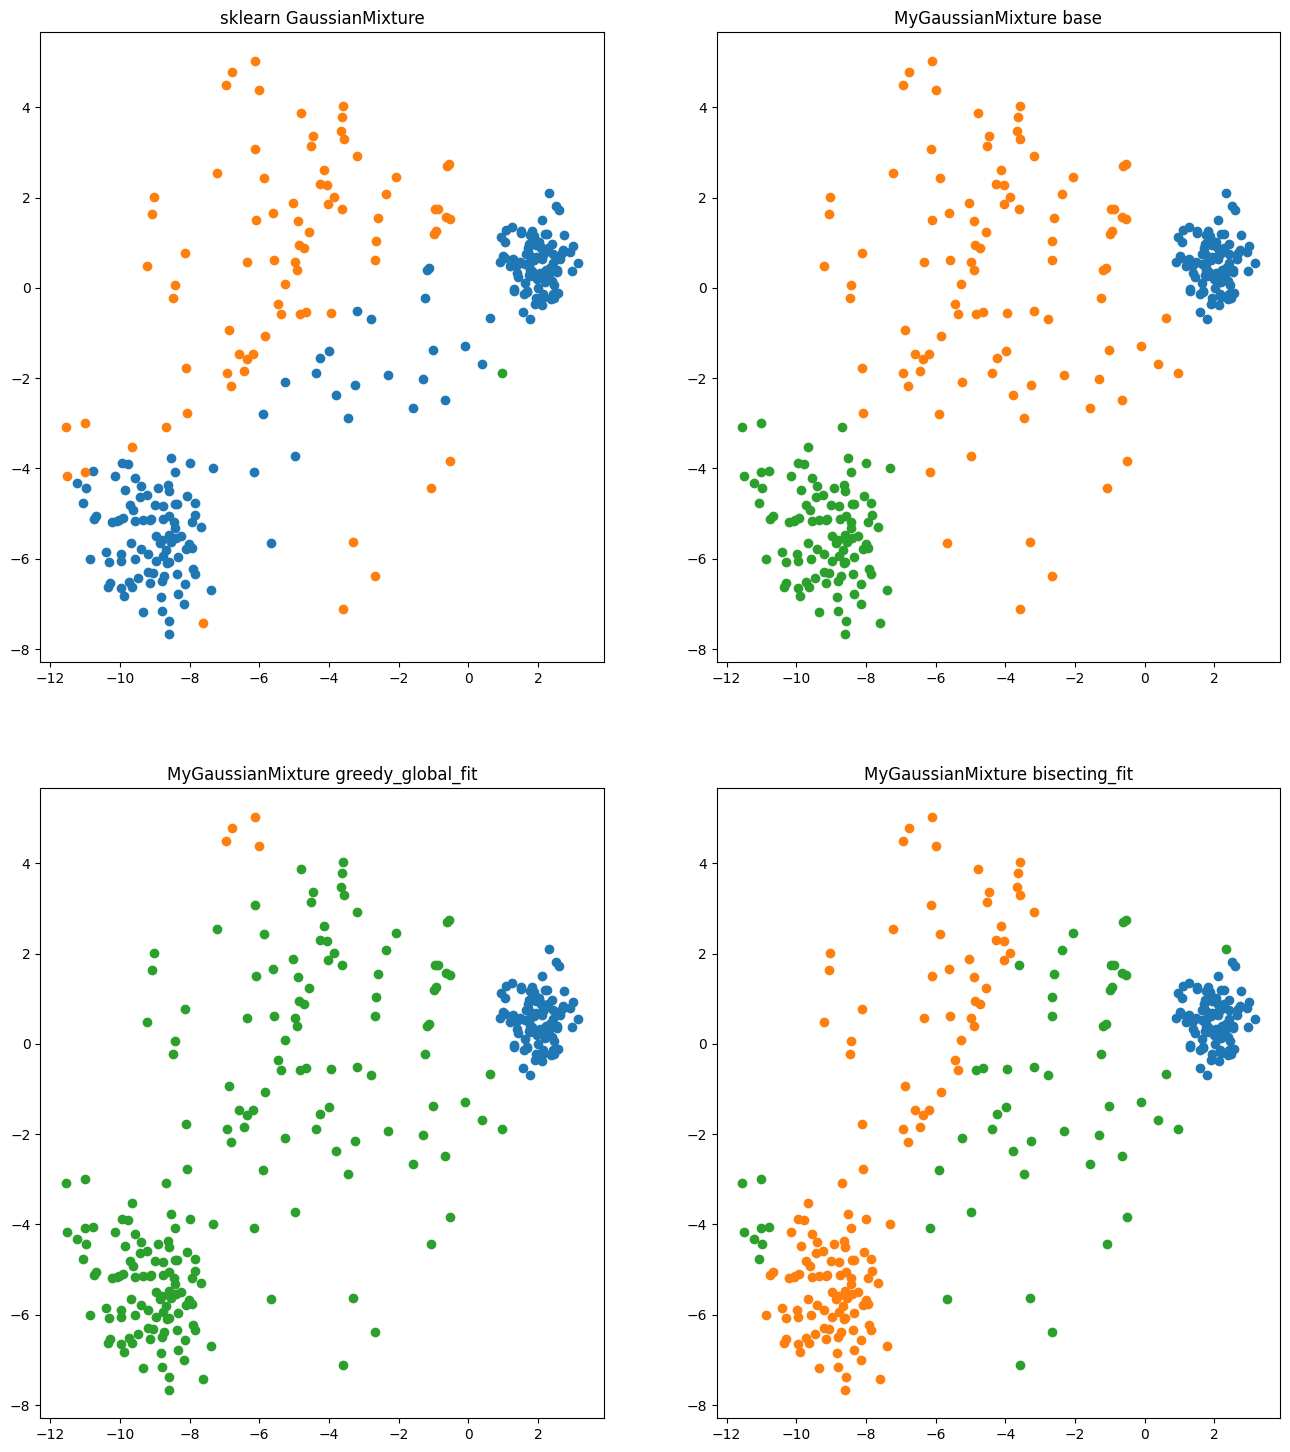

In [10]:
# =============================================================================
# Test with tolerance 0.1 
# =============================================================================

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16,18))

# sklearn GMM
GM = GaussianMixture(n_components=3, random_state=random_state, reg_covar=0, tol=1e-1, init_params='random', max_iter=50).fit(varied[0])
print("Number of EM iterations sklearn GaussianMixture = ",GM.n_iter_)
# MyGaussianMixture with base fit method
MyGM = MyGaussianMixture(n_components=3, random_state=random_state, tol=1e-1).fit(varied[0])
print("Number of EM iterations MyGaussianMixture fit = ",MyGM.n_iter_)
# MyGaussianMixture with greedy_global_fit method
MyGM_greedy = MyGaussianMixture(n_components=3, random_state=random_state, tol=1e-1, max_iter=10).greedy_global_fit(varied[0], sub_iter=1)
print("Number of EM iterations MyGaussianMixture greedy_global_fit sigma = ",MyGM_greedy.tot_n_iter)
# MyGaussianMixture with bisecting_fit
MyGM_bisecting = MyGaussianMixture(n_components=3, random_state=random_state, tol=1e-1).bisecting_fit(varied[0])
print("Number of EM iterations MyGaussianMixture bisecting_fit sigma = ",MyGM_bisecting.tot_n_iter)
# plotting
plot_pts_clusters((varied[0],GM.predict(varied[0])),axs[0,0],'sklearn GaussianMixture')
plot_pts_clusters((varied[0],MyGM.predict(varied[0])),axs[0,1],'MyGaussianMixture base')
plot_pts_clusters((varied[0],MyGM_greedy.predict(varied[0])),axs[1,0],'MyGaussianMixture greedy_global_fit')
plot_pts_clusters((varied[0],MyGM_bisecting.predict(varied[0])),axs[1,1],'MyGaussianMixture bisecting_fit')

Number of EM iterations sklearn GaussianMixture =  24
Number of EM iterations MyGaussianMixture fit =  33
Number of EM iterations MyGaussianMixture bisecting_fit sigma =  54


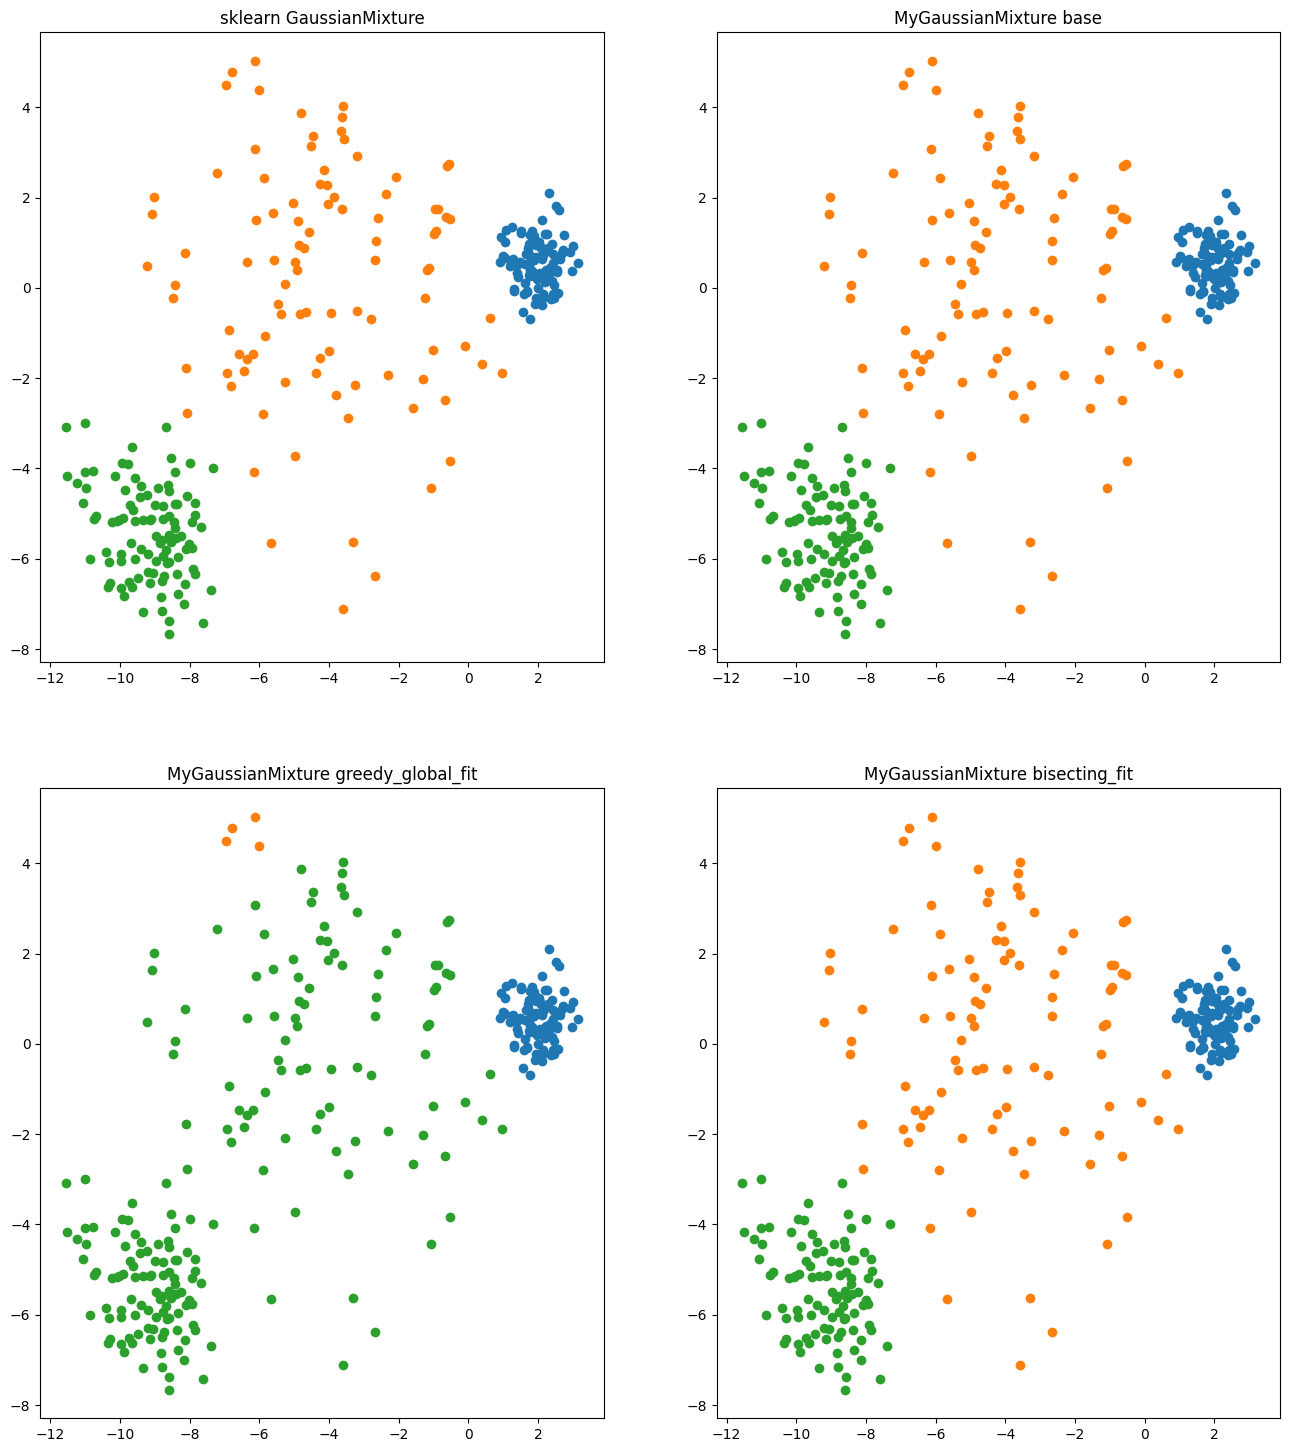

In [11]:
# =============================================================================
# Test with tolerance 0.001 
# =============================================================================

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16,18))

# sklearn GMM
GM = GaussianMixture(n_components=3, random_state=random_state, reg_covar=0, tol=1e-3, init_params='random', max_iter=50).fit(varied[0])
print("Number of EM iterations sklearn GaussianMixture = ",GM.n_iter_)
# MyGaussianMixture with base fit method
MyGM = MyGaussianMixture(n_components=3, random_state=random_state, tol=1e-3).fit(varied[0])
print("Number of EM iterations MyGaussianMixture fit = ",MyGM.n_iter_)
# MyGaussianMixture with bisecting_fit
MyGM_bisecting = MyGaussianMixture(n_components=3, random_state=random_state, tol=1e-3).bisecting_fit(varied[0])
print("Number of EM iterations MyGaussianMixture bisecting_fit sigma = ",MyGM_bisecting.tot_n_iter)
# plotting
plot_pts_clusters((varied[0],GM.predict(varied[0])),axs[0,0],'sklearn GaussianMixture')
plot_pts_clusters((varied[0],MyGM.predict(varied[0])),axs[0,1],'MyGaussianMixture base')
plot_pts_clusters((varied[0],MyGM_greedy.predict(varied[0])),axs[1,0],'MyGaussianMixture greedy_global_fit')
plot_pts_clusters((varied[0],MyGM_bisecting.predict(varied[0])),axs[1,1],'MyGaussianMixture bisecting_fit')

We notice that the base fitting method of MyGaussianMixture works well, the three blobs are clustered after 17 EM iterations. The sklearn method exits after only 2 EM iterations and it fails, probably due to a difference in the definition of the tolerance. By decreasing the tolerance to 0.001, the bisecting method succeeds too after 54 EM iterations.

##### Test on the grid of clusters

A set of blobs, each with number of samples 20, was generated on a grid of size 3x3. The number of samples and the grid size was reduced due to the high computational time (especially needed by the greedy global method). Three standard deviations were tested: 0.1, 0.2 and 0.3. The total number of EM iterations is displayed of get an idea
about the most costly method.

Number of EM iterations sklearn GaussianMixture sigma  0.1  =  3
Number of EM iterations MyGaussianMixture fit sigma  0.1  =  17
Number of EM iterations MyGaussianMixture greedy_global_fit sigma  0.1  =  13137
Number of EM iterations MyGaussianMixture greedy_global_fit sigma  0.1  =  561
Number of EM iterations sklearn GaussianMixture sigma  0.2  =  3
Number of EM iterations MyGaussianMixture fit sigma  0.2  =  445
Number of EM iterations MyGaussianMixture greedy_global_fit sigma  0.2  =  14477
Number of EM iterations MyGaussianMixture greedy_global_fit sigma  0.2  =  710
Number of EM iterations sklearn GaussianMixture sigma  0.3  =  3
Number of EM iterations MyGaussianMixture fit sigma  0.3  =  317
Number of EM iterations MyGaussianMixture greedy_global_fit sigma  0.3  =  1880
Number of EM iterations MyGaussianMixture greedy_global_fit sigma  0.3  =  1671


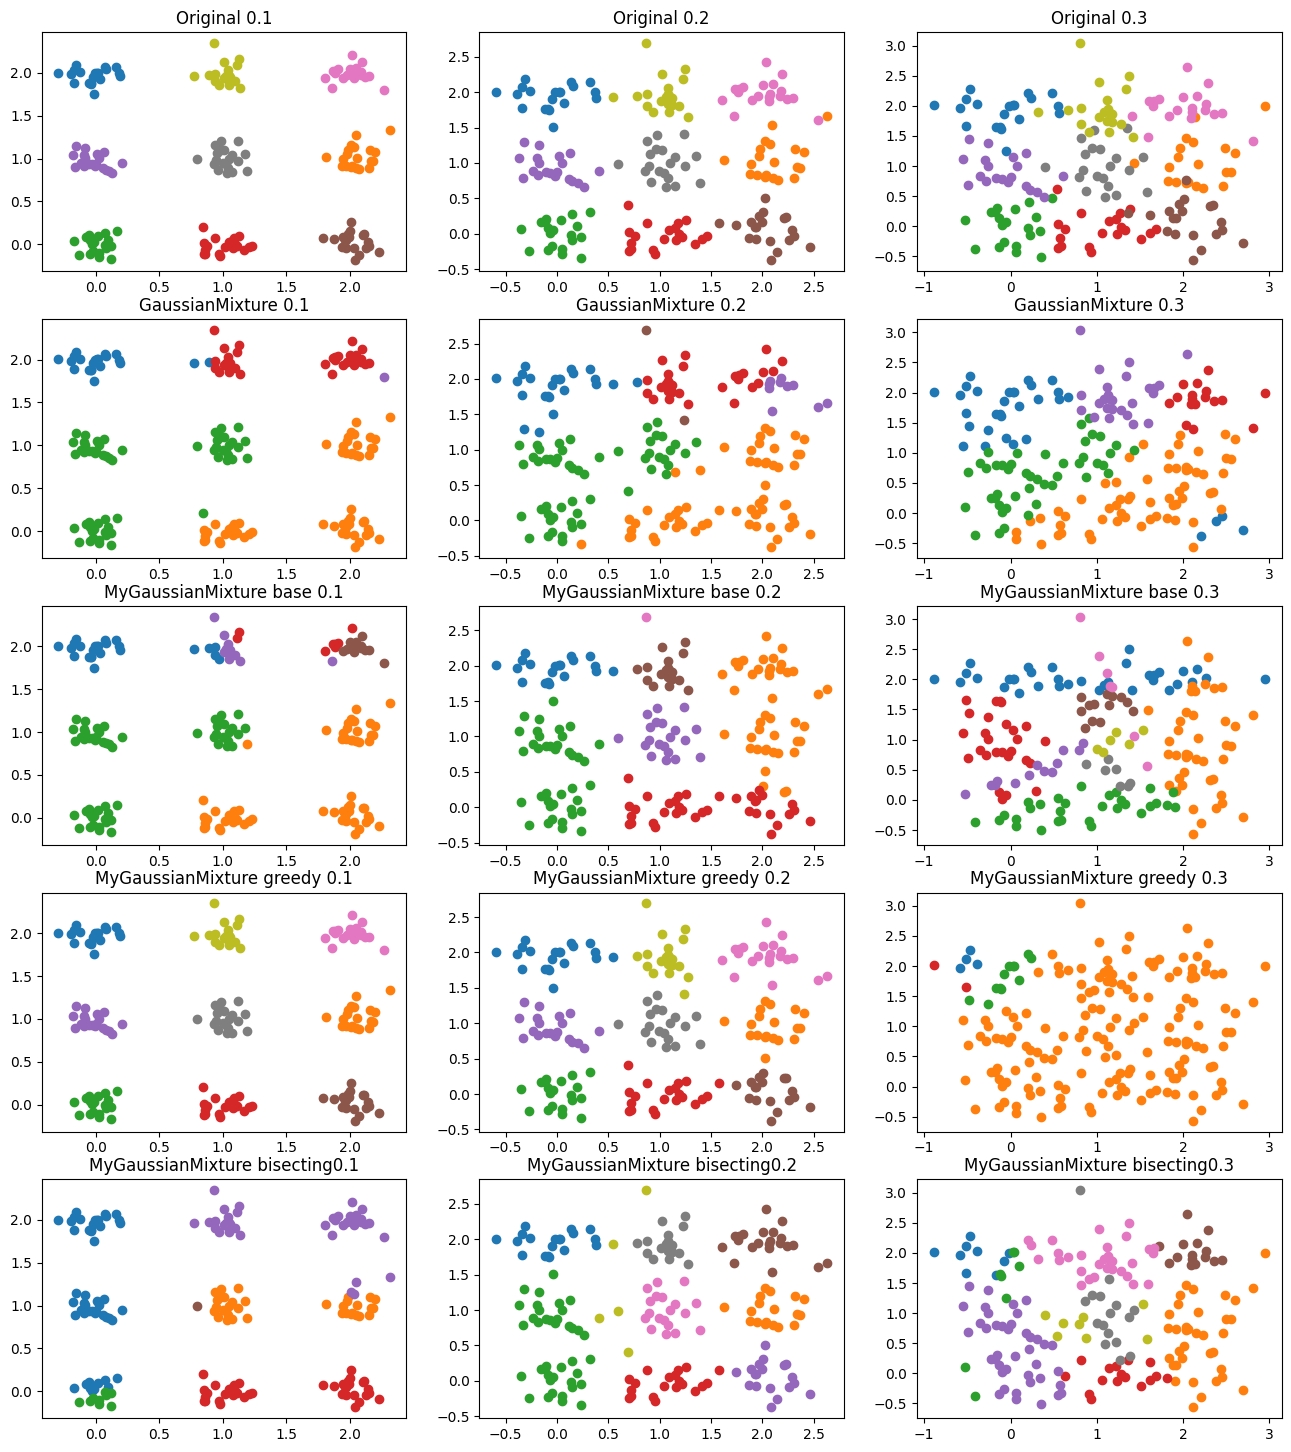

In [8]:
# =============================================================================
# Test on the grid of clusters
# =============================================================================

# Definition of the clusters centers on a grid of size NxN
N = 3
n_components = N*N
centers = []
for pos1 in range(N):
    for pos2 in range(N):
        centers.append([pos1,pos2])
centers = np.array(centers)

# Test with different standard deviations
sigma_tab = [0.1, 0.2, 0.3]

fig, axs = plt.subplots(nrows = 5, ncols = len(sigma_tab), figsize=(16,18))

random_state = 100
for i, sigma in enumerate(sigma_tab):
    # Generation of the data
    X, true_labels = make_blobs(n_samples=n_components*20, n_features=2, centers=centers, cluster_std=sigma, random_state=100)
    # sklearn GMM
    GM = GaussianMixture(n_components=n_components, random_state=random_state, init_params='random', tol=1e-4, max_iter=1000).fit(X)
    print("Number of EM iterations sklearn GaussianMixture sigma ",sigma," = ",GM.n_iter_)
    # MyGaussianMixture with base fit method
    MyGM = MyGaussianMixture(n_components=n_components, random_state=random_state, tol=1e-4, max_iter=1000).fit(X)
    print("Number of EM iterations MyGaussianMixture fit sigma ",sigma," = ",MyGM.n_iter_)
    # MyGaussianMixture with greedy_global_fit method
    MyGM_greedy = MyGaussianMixture(n_components=n_components, random_state=random_state, tol=1e-4, max_iter=10).greedy_global_fit(X, sub_iter=10)
    print("Number of EM iterations MyGaussianMixture greedy_global_fit sigma ",sigma," = ",MyGM_greedy.tot_n_iter)
    # MyGaussianMixture with bisecting_fit
    MyGM_bisecting = MyGaussianMixture(n_components=n_components, random_state=random_state, tol=1e-4, max_iter=1000).bisecting_fit(X)
    print("Number of EM iterations MyGaussianMixture greedy_global_fit sigma ",sigma," = ",MyGM_bisecting.tot_n_iter)
    # plotting
    plot_pts_clusters((X,true_labels),axs[0,i],'Original '+str(sigma))
    plot_pts_clusters((X,GM.predict(X)),axs[1,i],'GaussianMixture '+str(sigma))
    plot_pts_clusters((X,MyGM.predict(X)),axs[2,i],'MyGaussianMixture base '+str(sigma))
    plot_pts_clusters((X,MyGM_greedy.predict(X)),axs[3,i],'MyGaussianMixture greedy '+str(sigma))
    plot_pts_clusters((X,MyGM_bisecting.predict(X)),axs[4,i],'MyGaussianMixture bisecting'+str(sigma))

We can notice that the base fitting method, either the one of sklearn or MyGaussianMethod fails in clustering the blobs. The bisecting method (last row) also fails with the standard deviation 0.1 and 0.3. But it seems that it partially succeed with the standard deviation 0.2. 
The greedy method succeed very well with the standard deviations 0.1 and 0.2 with an number of EM iterations of about 14000, but it completely fails with 0.3.

Further investigations are needed to better understand this behavior and improve the precision and efficiency of the global fitting methods.